
<img src="files/oscar.png" height="75" width="75" align="center">
<h1><center>Predicting the Best Picture at the 92nd Academy Awards (February, 2020)</center></h1>
<br>
<h2><center>Springboard Capstone Project</center></h2>


# Table of Contents

1. [Introduction](#introduction)<br>
2. [Workflow](#workflow)<br>
3. [Data Acquisition and Cleaning](#acquisition)<br>
   2.1 Web scraping<br>
   2.2 Challenges<br>
   2.3 Data Structures<br>
   2.4 Movie Dataset<br>
   2.5 Oscars Dataset<br>
4. [Data Wrangling, Feature Engineering and Visualization](#wrangling)<br>
   4.1 Feature engineering<br>
   4.2 Oscar Scores<br>
   4.3 Oscar Counts<br>
   4.4 Organizing Genres<br>
   4.5 Adjust for inflation<br>
   4.6 Imputing missing information<br>
5. Exploratory Data Analysis<br>
   5.1 Visualizing Genre Information<br>
   5.2 Visualizing Film Rankings<br>
   5.3 Visualizing Correlations<br>
   5.4 Visualizing Budget and box office information<br>
6. [Predictive Modeling](#predict)<br>
   6.1 Logistic regression<br>
   6.2 K Nearest Neighbors<br>
   6.3 Random Forest Classifier<br>
   6.4 Ensemble method: Bag of KNN<br>
   6.5 Adaptive Boosting (Adaboost) classifier<br>
   6.6 Neural Network<br>
   6.7 Ensemble of Neural Network<br>
   6.8 Performance Measures and Grand Average<br>
   6.9 [The Final Prediction](#final_predict)
7. [Predicting Winners in the Major Categories](#predict_winners)<br>
   7.1 Best Picture<br>
   7.2 Best Director<br>
   7.3 Best Actor<br>
   7.4 Best Actress<br>
   7.5 Best Supporting Actor<br>
   7.6 Best Supporting Actress<br>
8. [Future Plans](#future)<br>
9. [Appendix](#appendix)
   1. List of files
   2. Wikipedia web scraping codes
   3. Prediction and ML Related Codes

But first, we begin my importing all the necessary packages and modules. 

In [1]:
import pandas as pd
import numpy as np
import requests
import wikipedia
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapy import selector
import datetime as dt
import pickle
import seaborn as sns
from skimage import io
from IPython.display import clear_output
import pdb
plt.style.use('ggplot')
%matplotlib inline

# 1.0 Introduction<a class="anchor" id="introduction"></a>

Our objective in this project was to predict the winner of the Best Picture Category in the 92nd Academy Award, also known as the Oscars, scheduled to be announced on February 9th, 2020. 

Earning a nominations for Best Picture Award an Oscar Award can significantly boost box office sales of a movie theater screening a nominated film, and distributors in the entertainment industry have strong incentives to predict the movies that are most likely to success, especially in the months leading up to the Oscars award ceremony. 

By acquiring the most updated and reliable information from the web, and by mining historical records from past award ceremonies of the Academy of Motion Pictures Arts and Sciences for films and individuals, we attempted try to predict the winner of the Best Picture at the 2020 Oscars. 

To make the best possible predictions, we explored two important criteria cinematic success: (1) Awards and nominations earned in past Academy Awards ceremonies and, (2) The popular appeal of a film measured through the ratings in the International Movie Database (IMDB) website, the largest public database of movies on the internet. 

We obtained data for almost 20,000 movies from 1955 to 2018. After rejecting small budget films and films with corrupted data, we considered a finaly set of 5000 films and quantified them along several different dimensions. First, each movie was scored based on popularity and ratings given by millions of fans on the IMDB web site. Second, past years' Oscar awards were obtained at two different levels: at the level of the Film and also at the level of individual winners and nominees in the Best Actress, Actor, Supporting Actror and Actress, Director, Screenwriter and Picture categories. The movies were then scored using a simple scoring function in 4 different ways:
* the pre Oscar Score
* the post Oscar Score
* the pre Oscar Count
* the post Oscar Count
The scoring functions are described in greater detail below. 

These features were then considered alongside the various information about a film - cast size, running time, budget, box office revenues, pre and post Oscar scores and counts. Several learning algorithms were trained on the movies until 2018 and the trained models were then used to predict win probabilities of movies of 2019 that are being considered in the 2020 Oscars. 


# 2.0 Workflow
The project workflow was divided into three main stages:
1. Data acquisition and cleaning
2. Data wrangling and visualization
3. Predictive modeling and Machine Learning

## 2.1  Data Acquisition and Cleaning

The predictive power of a model depends crucially on the quality of the data. Therefore, a significant amount of time was spent in the first part of the project involving data acquisition and cleaning before organizing them in dataframes. Although several datasets for movies are freely available on the internet on websites such as Kaggle, dataworld and statcrunch, they were all found to be either outdated, incorrect or partially corrupted. 

To circumvent the problem of fixing these datasets, and to obtain the most updated data about films from recent years, I found it prudent and more efficient to obtain information directly from the Internet from two very popular publicly available data: Wikipedia and The Internet Movie Database (IMDB). Both the Wikiepdia and OMDB API were used to scrape off information. Inconsistencies in the data were identified using regular expressions (RE) and missing.

## 2.2 Data Wrangling
Data from over 6000 movies were obatined from the Wikipedia and IMDB websites. In the data wrangling stage, several important steps were taken.
1. The genre information for each movie was converted into one-hot encoded vectors and saved in a separate dataframes. 
2. Missing budget and box office information wewre imputed using linear regression
3. A scoring function was defined to capture both the anticipated performance as well as the actual performance of a film at the Academy Awards.
4. New features were derived based on existing features for each film, which were later used in the predictive modeling stage. 

Finally,we aggregated all the information into a single data frame and the imdb rating, oscar scores, running time, genre, bufget and box office information were all used to train a model to predict the nominees and winners aty the 2020 Oscars scheduled for February 9th, 2020.

## 2.3 Predictive Modeling
We used several machine learning models to predict the probability of earning a nomination based on the historical trends of films from 1960 to 2019. We deliberately chose to exclude pre-1960 films because of several reasons: not enough information about movies prior to 1960 was available on Wikipedia, not enough user ratings on IMDB, and many changes in the early years of the Academy Awards were made to the varioius categories that became standard after 1960. 

For predictive modeling, we used several machine learning models like logiatic regression, K-Nearest Neighbors (KNN), Random Forest Algorithm, Adaptive boosting (AdaBoost), Neural Networks and Ensemble of Neural Networks. A grand average was calculated at the end based on the predictions of each model and the final score was computed for each film. 

The **workflow** of the project is as follows:
<img src="files/workflow.png" height="800" width="800" align="center">

The code and data for this summary report have been uploaded on the GitHub page: https://github.com/ronsg83/Predicting-2020-Oscars

# 3.0 Data Acquisition<a class="anchor" id="data_acquisition"></a>

Data was acquired from 2 well known websites in the internet: the Internation Movie Database (IMDB) and Wikipedia. The following tools and packages were used to obtain information from the 2 websites.
1. Wikipedia and OMDB API
2. Web scraping and HTML parsing with BeautifulSoup( )
3. Regular expression for cleaning and normalizing data

## 3.1 Web Scraping Movie Information<a class="anchor" id="scrape"></a>

The Wikipedia web sites for movies contains most of the important information about them, especially for movies swince 1960. The IMDB website, on the other hand, had movie information as well as viewer ratings from a large number of users. 

<img src="files/lawrence.png" height="500" width="500" align="center" style="width:40%">


A Python script was written for obtaining information from over 6000 movies from 1960 to 2019. While wikipedia was found to contain almost all the information that we were seeking, there were several problems that needed to be addressed. First, the wikiepedia API needed to be queried in a few different ways in order to arrive at a movie web-page. For example, sending a get request of "Titanic" to the wikiepdia API returned a page about the original ship rather than the film. We therefore had to try a few different options such as Titanic (film) and Titanic (1997 film). 

Once a page was accessed, we obtained the key information about a film, namely its producers, directors, cast, running time, budget and box office information as shown below for Lawrence of Arabia (1962), which was used for predicting the Oscars for 2020. 
The information is returned as a Python dictionary.
<br>
<img src="files/wiki4.png" height="100" width="100" align="left" style="width:40%">
<img src="files/wiki2.png" height="100" width="100" align="center" style="width:40%">

Our first goal was to create a list of films on which to base our predcitions. The following piece of code obtains the list of all British and American films made from 1960 tp 2019. 

In [5]:
%%time

## This function obtains list of all British and American Movies in specified years
primary_list = []
for year in range(1991,2020):
    print(f"In {year}")
    if year%10==0:
        clear_output() # clear output evey 10 years for tidyness
    # Set URL
    my_url = ['List_of_American_films_of_'+ str(year), 'List_of_British_films_of_'+ str(year)]
    
    # Obtain list of films, parse html with BEautiful Sup and add the movie title, year and wikipedia link to list
    for url in my_url:
        page = wikipedia.page(url)
        soup = BeautifulSoup(page.html(),'lxml')
        tables = soup.find_all('table', class_ = 'wikitable') # , class_="wikitable sortable jquer-tablesorter")
        for table in tables:
            films = table.find_all('i')
            for film in films:
                title = film.text
                # print(title)
                link = film.find_all('a', href=True, title = True)
                if len(link)==0:
                    continue
                else:
                    link = link[0]['href']
                primary_list.append((year,film.text.lower(),link))

        
pickle.dump(primary_list,open('my_data/PRIMARY_LIST_1950_2019', "wb" ))
len(primary_list)

In 2011
In 2012
In 2013
In 2014
In 2015
In 2016
In 2017
In 2018
In 2019
CPU times: user 14.9 s, sys: 430 ms, total: 15.4 s
Wall time: 2min 52s


10496

For each movie, the following information was scraped from Wikipedia.
1. Director
2. Producers
3. Cast
4. Running time
5. Budget
6. Box office revenues
7. Screenplay
8. Book adapted from (if based on a book)

The following information was obtained using the OMDB API:
1. Average IMDB rating
2. Number of votes
3. IMDB ID, a unique string associated for every movie in the Database.

For each movie, this was saved as a Python dictionary.

## 3.2 Oscars Information

Our next goal was to obtain the information about the winners and nominees in the various categories for the Academy Awards. Although the Oscars have been awarded since 1927, we considered the nominated movies from 1955 onwards. The primary reason for this was that the early years of the Oscars overlkapped with the black-and-white era of films when and contained several categories that were later discareded or abandoned. 

<img src="files/oscars1.png" height="200" width="200" align="left" style="width:40%">
<img src="files/oscars2.png" height="200" width="200" align="center" style="width:40%">

For the Oscars, we found the Wikipedia pages of the coresponding years to contain the most reliable data. We only considered the most important categories which were the following:
1. Best Picture <br>
2. Best Actor/Actress <br>
3. Best Supporting Actor/Actress <br>
4. Best Director <br>
5. Best Screenplay <br>


## 3.3 Challenges in data acquisition

The success of any machine learning algorithm depends on the quality of the Data. The main challenmges that I faced in the data acquisition phase were the following:
1. Corrupted data: crucial information was found to be missing
2. Inconsitent entries: Columns that are supposed to contain the names of winners often contained the names of the movie and vice versa. 
3. Outdated information: Budget and box-office information were found to be outdated. 
4. Inconsistent format: For some movies, the budget was specified as ``$``2.3 million, for others it was ``$``2,300,016 and for some it was ``$``0.002287 billion. Regular expressions (re) was uysed to normalize everything in million dollar units. 

<img src="files/regex.png" height="200" width="200" align="center" style="width:60%">


The key challenge to find reliable movie information, the information for past academy award, and budget and box office in a single source. Therefore, I decided to go to multiple sources and obtain the most reliable and updated infomation about movies that can be found on the world wide web. While IMDB had an exhaustive list of all cast members (even minor characters), the wikipedia API made it both faster and simpler to obtain the key information about movies. 

In [3]:
import pandas as pd
import pickle
df_oscars_wide = pd.read_csv('my_data/df_oscars_wide_FINAL.csv', index_col=[0])
df_oscars_long = pd.read_csv('my_data/df_oscars_long_FINAL.csv', index_col=[0])
df_individual_long = pd.read_csv('my_data/df_individual_long_FINAL.csv', index_col=[0])

movie_dict = pickle.load(open("my_data/movie_dict_FINAL","rb"))

all_categories = pickle.load(open("my_data/all_oscar_categories","rb")) 
major_categories = pickle.load(open("my_data/major_oscar_categories","rb")) 
minor_categories = pickle.load(open("my_data/minor_oscar_categories","rb")) 
print("All categories:\n", all_categories)
print('\n')
print("Major categories:\n", major_categories)
print('\n')
print("Minor categories:\n", minor_categories)


All categories:
 ['picture', 'director', 's_actor', 's_actress', 'actor', 'actress', 'screenplay', 'music', 'cinematography', 'editing', 'effects', 'sound', 'costume', 'song', 'art_direction']


Major categories:
 ['picture', 'director', 's_actor', 's_actress', 'actor', 'actress', 'screenplay']


Minor categories:
 ['music', 'cinematography', 'editing', 'effects', 'sound', 'costume', 'song', 'art_direction']


## 3.3 Data Structures
The primary dataframes and dictionaries created from the acquired data is shown below. THe information obtaineed through web scraping were stored in the following structures:
1. **movies_dict**: Dictionary containing all information about a particular movie
2. **df_oscars_wide**: A dataframe of wins and nominations. Each row is a film and each column a category. 'W' indicates 'Win', 'N' indicates 'Nomination', 'WN' indicates both a win and a nomination in the same category for a film, and 'O' indicates no wins or nomination. 
3. **df_oscars_long**: A melted datafrom with columns correspoding to title, year, name (film or individual) and result (W,N, O)
4. **df_individual_long**: A melted datafrom with columns correspoding to title, year, name (film or individual) and result (W,N, O) for individual winners and nominees

### 3.3.1 The Movies Dataset

For each movie, the information about all the key attributes of the movie were obtained and saved in a dictionary. The example for  _Lawrence of Arabia_ , 1962 is shown below. 



In [4]:
movie_dict['lawrence of arabia',1962]

{'title': 'lawrence of arabia',
 'year': 1962,
 'screenplay': ['t.e. lawrence', 'robert bolt', 'michael wilson'],
 'director': ['david lean'],
 'cast': ["peter o'toole", 'jack hawkins', 'alec guinness', 'anthony quinn'],
 'imdbID': 'tt0056172',
 'plot': 'the story of t.e. lawrence, the english officer who successfully united and led the diverse, often warring, arab tribes during world war i in order to fight the turks.',
 'language': 'English, Arabic, Turkish',
 'running_time': '228 min',
 'imdb_rating': 8.3,
 'n_votes': 251082.0,
 'metscore': 10.0,
 'rotten_tomatoes': 9.8,
 'other_wins': 23.0,
 'other_noms': 14.0,
 'genre': ['adventure', ' biography', ' drama', ' history', ' war'],
 'budget': 15.0,
 'opening_weekend': 0.02,
 'gross_box_office': 45.71}

The DataFrames obtained after webscraping and cleaning are shown below. 'W' denotes a win, 'N' denotes nomination, and 'O' denotes no win or nomination in the particular category. 

### 3.3.2 The Oscars Data
The DataFrames obtained after webscraping and cleaning are shown below. 'W' denotes a win, 'N' denotes nomination, and 'O' denotes no win or nomination in the particular category. 

Two main types of dataframes were created:
1. Wins and nominations at the level of each film
2. Wins and nominations at the individual level

In [5]:
df_oscars_wide.query("year == 1997").head()

,title,year,imdbID,actor,actress,cinematography,costume,director,editing,effects,music,picture,s_actor,s_actress,screenplay,song,sound
5340,…first do no harm,1997,tt0118526,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5341,12 angry men,1997,tt0118528,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5342,"20,000 leagues under the sea",1997,tt0118248,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5343,4 little girls,1997,tt0118540,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5344,8 heads in a duffel bag,1997,tt0118541,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [6]:
df_individual_long.query("year == 1995").query("category == 'director'")

,year,name,category,result
3041,1995,Robert Zemeckis,director,W
3042,1995,Woody Allen,director,N
3043,1995,Quentin Tarantino,director,N
3044,1995,Robert Redford,director,N
3045,1995,Krzysztof Kieślowski,director,N


In [7]:
df_oscars_long.query("category == 'picture'").query("year == '1994'").query("result!='O'")

,title,year,category,result
22403,forrest gump,1994,picture,W
22404,four weddings and a funeral,1994,picture,N
22405,pulp fiction,1994,picture,N
22406,quiz show,1994,picture,N
22407,the shawshank redemption,1994,picture,N


### 3.3.3 The Oscar Categories

In this project, since our goal was to predict the Best Picture Award, we restricted ourselves only to the major categories as specified by the Academy of Motion pictures. These categories are:
1. Best Picture <br>
2. Best Actress<br>
3. Best Actor<br>
4. Best Director<br>
5. Best Supporting Actress<br>
6. Best Supporting Actor<br>
7. Best Screenplay<br>


Text(0.5, 1.0, 'The Major Categories')

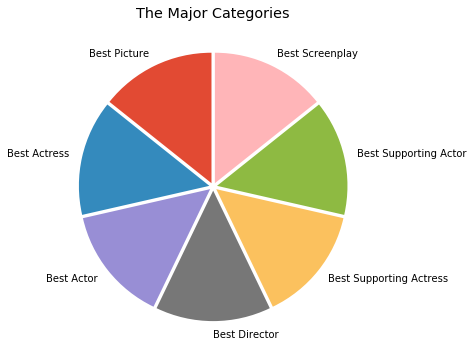

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
categories = ['Best Picture', 'Best Actress', 'Best Actor', 'Best Director',
              'Best Supporting Actress', 'Best Supporting Actor', 'Best Screenplay']
nums = np.ones(len(categories))
explode = np.ones(len(categories))*0.03
plt.pie(nums, labels = categories,explode = explode,shadow=False, startangle=90)
plt.title('The Major Categories')

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from skimage import io
from IPython.display import clear_output
%matplotlib inline
plt.style.use('ggplot')

# 4.0 Data Wrangling<a class="anchor" id="wrangling"></a>

Data was obtained for almost 6000 movies between the years of 1960 and 2019 and organized in a pandas dataframe with columns containing information for title, year, budget, box office, cast size, genres and running time. We then decided to score each film based in two different ways. 

First, every movies from past years were given a score based on past Academy Award performance of cast, director, writers and producers. Thus, a movie directed or starring previous years' award winners received a high score, while movies with newcomers and unknown directors received a low score. 

The Data Wrangling phase thus consisted of two important steps. 
1. Creating the Score Function and the Genre Dataframe
2. Imputing missing information about budget and box office using regression techniques

Since we considered movies spanning 6 decades, we accounted for inflation and normalized all monetary information to the value of a dollar in 1984. 

I then scored each movie in two different ways. First, each movie was scored based on the number of awards and nominations received. The scoring system was designed to satisfy three key criteria:
1. Simplicity
2. To account for competition within each category. A winner who beat 3 other nominees scored lower points than a winner who beat 5.
3. To normalize for numbers of nomination. Some years saw more nominations in a given category than other years.

Next, each movie was scored on its cast, director, writer, producer and cinematographer according to awards and nominations that they received prior to that particular film. In other words, movies with newcomers who had never receieved a nomination at any of the previous ceremonies would receive a low score. Likewise, directed by former winners and a celebrated cast obtained a higher score. 


## 4.1 Feature Engineering
A few new features were engineered from the available information. 
1. Oscar score: Each movie was scored based on its performance at the Academy Awards.
2. Pre-Oscar Score: Each movie was scored based on past years' performance of its directors, producers, writers and cast. 
3. Cast size: The size of the main cast (not minor roles) were obtained from Wikipedia for each film.
4. Genre and Genre span: Movies spaning multiple genres, such as romantic comedies and historica epic dramaes were quantified depending on the numbers of genres it spanned. 

### 4.1.1 The Score DataFrames

#### Pre-Score
The following are a few examples of the pre- and post-scores of films. A high pre-score denotes that the movie is directed by or starring several past winners or nominees. A low pre-score, on the other hand, denotes that the movie does not have any high profile actors or directors. 

#### Post-Score
The post score is simply the total score obtained by a film at the Oscars that year. In each category, if there are a total of n nominees, the winning film receives a score of 'n'  and the nominees receive a score of 1/n. 


In [13]:
df_movies_oscars_prepost_score = pd.read_csv('my_data/df_movies_oscars_prepost_score.csv', index_col=[0])
df_movies_oscars_precount = pd.read_csv('my_data/df_precount_FINAL.csv', index_col=[0])
df_movies_oscars_postcount = pd.read_csv('my_data/df_postcount_FINAL.csv', index_col=[0])
df_movies_oscars_prepost_score.query("year == 1975").sort_values(by='postscore', ascending=False).head()

,imdbID,title,year,prescore,postscore
832,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20
1971,tt0072890,dog day afternoon,1975,0.6,5.80
1770,tt0073692,shampoo,1975,16.2,4.30
3556,tt2281375,nashville,1975,0.2,0.65
2927,tt0072684,barry lyndon,1975,1.6,0.50


### 4.1.2 The Count DataFrames

For each film, we also counted the number of wins and nominations for each film before and after the Oscars. Again, as before, if a film cast, director and writer has a combined 6 nominations and 7 wins before the film is made, then it receives a score of 6 and 7 respectively. 
<img src="files/scoring.png" height="1800" width="1800" align="center" style="width:80%">


In [14]:
df_movies_oscars_precount.query("year == 2017").sort_values(by='precount_wins', ascending=False).head()

,title,year,imdbID,precount_wins,precount_noms
12760,the post,2017,tt6294822,7,25
12758,downsizing,2017,tt1389072,5,8
12751,wonder wheel,2017,tt5825380,4,25
12727,suburbicon,2017,tt0491175,3,9
12608,going in style,2017,tt2568862,3,10


In [15]:
df_movies_oscars_postcount.query("year == 1975").sort_values(by='win', ascending=False).head()

,title,year,imdbID,win,nom
3548,one flew over the cuckoo's nest,1975,tt0073486,5,6
3574,shampoo,1975,tt0073692,1,3
3580,the sunshine boys,1975,tt0073766,1,3
3496,dog day afternoon,1975,tt0072890,1,5
3585,three days of the condor,1975,tt0073802,0,0


### 4.1.3 The Genre Dataframe

Finally, the genre information for each movie was converted into one-hot encoded variables and saved in a separate dataframe. 

In [16]:
df_genres = pd.read_csv('my_data_4/df_movies_genres.csv', index_col=[0]).drop('book',axis = 1)
df_genres.tail()

,title,year,imdbID,sup,dis,dys,sci,oth,cri,psy,...,mys,ani,his,bio,adv,thr,act,mon,based_on_book,other
4713,before night falls,2000.0,tt0247196,0,0,0,0,0,0.0,0,...,0,0,0,1,0,0.0,0,0,1.0,0.0
4714,the good german,2006.0,tt0452624,0,0,0,0,0,0.0,0,...,1,0,0,0,0,0.0,0,0,1.0,0.0
4715,an inconvenient truth,2006.0,tt0497116,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0.0,1.0
4716,the visitor,2008.0,tt0857191,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0.0,0.0
4717,victoria & abdul,2017.0,tt4226388,0,0,0,0,0,1.0,0,...,0,0,0,1,0,0.0,0,0,1.0,0.0


### 4.1.4 Adjusting for Inflation

Since we obtained financial information of movies spanning 6 decades, it was necessary to account for inflation and adjust the budget and box office information. We used data about the Consumer Price Index (CPI) in the United States from the U.S. Inflation Calculator website (https://www.usinflationcalculator.com/inflation/current-inflation-rates/) and used the inflation factors to normalize al financial figures to the strength of USD in 1984. 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
cpi = pd.read_csv('my_data_4/CPI_index.csv')
cpi.drop(0, axis = 0, inplace=True)
print('\t\t\t\t\t\tINFLATION RATES:')
cpi.tail(10)

						INFLATION RATES:


,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
97,2010,216.687,216.741,217.631,218.009,218.178,217.965,218.011,218.312,218.439,218.711,218.803,219.179,218.056,1.5,1.6
98,2011,220.223,221.309,223.467,224.906,225.964,225.722,225.922,226.545,226.889,226.421,226.230,225.672,224.939,3,3.2
99,2012,226.655,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601,229.594,1.7,2.1
100,2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049,232.957,1.5,1.5
101,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812,236.736,0.8,1.6
102,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525,237.017,0.7,0.1
103,2016,236.916,237.111,238.132,239.261,240.236,241.038,240.647,240.853,241.428,241.729,241.353,241.432,240.007,2.1,1.3
104,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524,245.120,2.1,2.1
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233,251.107,1.9,2.4
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,NaN,NaN,NaN,NaN


Text(0, 0.5, 'inflation rate')

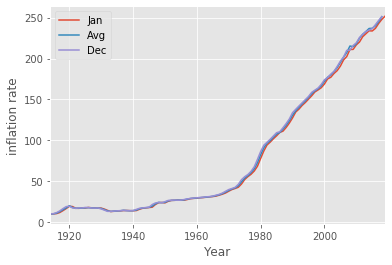

In [18]:
cpi.plot('Year', ['Jan', 'Avg', 'Dec'])
plt.ylabel('inflation rate')
# cpi.plot('Year', 'Avg-Avg')

All the information about the movies were orgainized in a single data frame and saved for later analyses. 

In [19]:
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
df_movies.head(200).tail()

,imdbID,title,year,n_votes,imdb_rating,budget,box_office,cast,genre,running_time,inflation_factor,budget_adjusted,box_office_adjusted
226,tt0080684,star wars: episode v - the empire strikes back,1980,1082223,8.7,23.0,538.4,9.0,4.0,124.0,1.213592,27.912621,653.398058
228,tt0910970,wall-e,2008,934009,8.4,180.0,533.3,7.0,3.0,97.0,0.464462,83.603108,247.697431
230,tt1663202,the revenant,2015,646164,8.0,135.0,533.0,4.0,4.0,156.0,0.421911,56.957940,224.878384
231,tt5848272,ralph breaks the internet,2018,105464,7.1,175.0,529.3,9.0,3.0,112.0,0.398237,69.691406,210.786637
232,tt3874544,the boss baby,2017,98433,6.3,125.0,528.0,5.0,3.0,97.0,0.407963,50.995431,215.404700


### 4.1.5 Imputing Budget Information

The budget and box office information in several of the movie prior to 2019 were found to be missing. Among the 2019 movies, most of the box office information were incorrect because the movies were released very recently and did not get time to run their full course of box office revenues. 

In order to impute the budget and box office information, we followed a 2 steip process. First, lasso regression was used to estimate the budget information for all movies that had the information missing. Next, the estimated budget information was used to further estimate the box office information for **all** 2019 movies. 

The lasso regression allowed us to estimate the most critical features contributing to the budget and box office estimates. The figures below showed us how the estimated budget compared with the actual budget, and the coefficients that contributed to the estimates. 



Finally, we used the budget information to estimate the box office information of the 2019 movies. 
<img src="files/boxoffice.png" height="400" width="400" align="left">

/Users/ranitsengupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


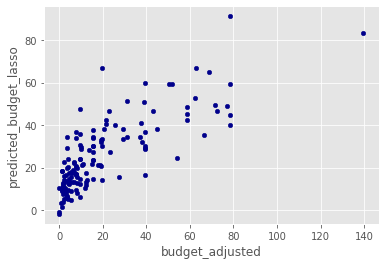

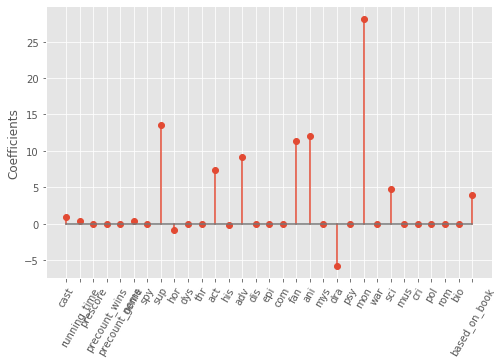

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

basic_ID_columns = ['imdbID', 'title', 'year', 'cast', 'running_time']
genre_columns = ['genre', 'spy', 'sup', 'hor', 'dys', 'thr', 'act',
       'his', 'adv', 'dis', 'epi', 'com', 'fan', 'ani', 'mys', 'dra', 'psy',
       'mon', 'war', 'sci', 'mus', 'cri', 'oth', 'pol', 'rom', 'bio',
       'based_on_book']
imdb_columns = ['n_votes', 'imdb_rating']
pre_oscar_columns = ['prescore', 'precount_wins', 'precount_noms']
post_oscar_columns = ['postscore', 'win', 'nom']
derived_columns = ['budget_per_actor', 'budget_per_time',
       'runtime_per_actor', 'percent_revenue', 'total_ratings']
budget_columns = ['budget', 'inflation_factor','budget_adjusted']
box_office_columns = ['box_office']

df_mega = pd.read_csv('my_data_4/DF_MEGA.csv', index_col=[0])
df_mega['box_office_adjusted'] = df_mega['box_office']*df_mega['inflation_factor']

df_mega_2019 = pd.read_csv('my_data_4/DF_MEGA_2019.csv', index_col=[0])
df_mega_2019['box_office_adjusted'] = df_mega_2019['box_office']*df_mega_2019['inflation_factor']
df_2019_budget = df_mega_2019[basic_ID_columns + ['budget_adjusted']]

all_predictors = basic_ID_columns + pre_oscar_columns + genre_columns

X = df_mega[all_predictors].drop(['imdbID', 'title', 'year', 'oth'], axis=1)
y = df_mega['budget_adjusted']
X_2019 = df_mega_2019[all_predictors].drop(['imdbID', 'title', 'year', 'oth'], axis=1)
y_2019 = df_mega_2019['budget_adjusted']
df_2019_budget = df_mega_2019[basic_ID_columns + ['budget_adjusted']]


lasso = Lasso(alpha=0.01, normalize=True) 
lasso_coef = lasso.fit(X, y)
cv_results = cross_val_score(lasso, X, y, cv=5)
print("5-fold cross validation result:",np.mean(cv_results))

# Now oredict 2019 budget
budget_pred_lasso = lasso.predict(X_2019)
df_2019_budget['predicted_budget_lasso'] = budget_pred_lasso
df_2019_budget.head()
df_2019_budget.plot.scatter(x='budget_adjusted', y='predicted_budget_lasso',c='DarkBlue')
clear_output()
names = X_2019.columns
plt.figure(figsize=(8,5))
_ = plt.stem(range(len(names)), lasso_coef.coef_)
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients')


# 5.0 Exploratory Data Analysis<a class="anchor" id="eda"></a>

Exploratory Data Analysis was performed to identify trends in genre, imdb ratings, the oscar scores as well as the budget and box office information. 

First, we looked at the distribution of the different genres for the films that won a nomination at the Oscars. Drama was the most overwhelmingly popular genre. In fact, it was discovered that no movie that wasn't a drama of some form ever won the Oscars. 

## 5.1. Number of Nominations over the Years
We looked at the distribution of genres of movies that have been nominated for in the Best Picture category. Historically, 4 or 5 movies would be nominated in the Best Picture Category, but number increased to 8 or 9 from 2009 onwards. 

(0, 10)

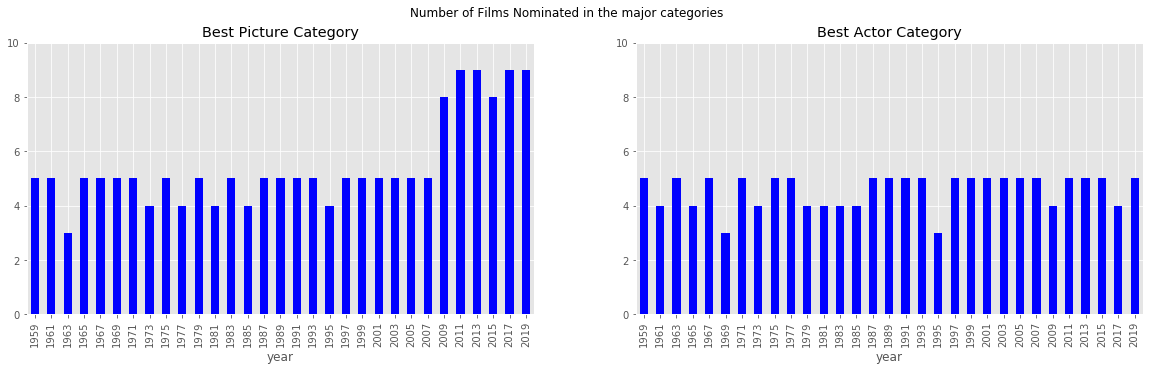

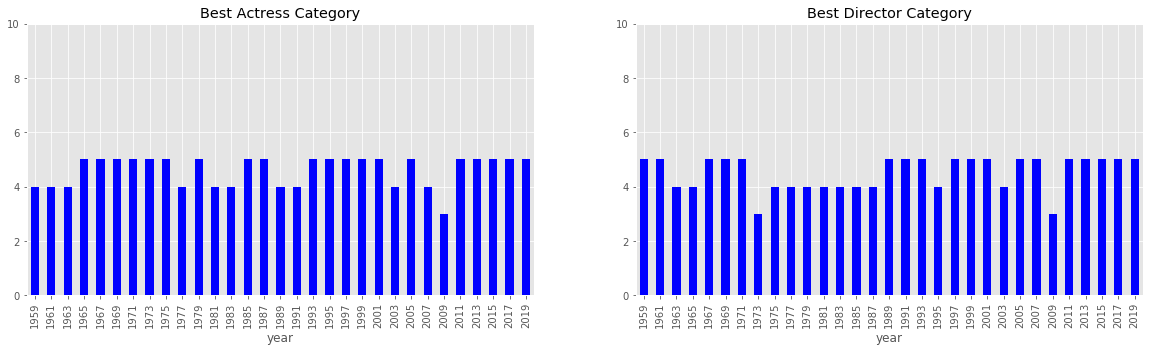

In [14]:
n=2
DF_main = pd.read_csv('my_data/df_main_FINAL.csv', index_col=[0])
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df = DF_main[DF_main.picture != 'O']
df.groupby('year').count().title[9::n].plot(kind='bar', color = 'b')
plt.title('Best Picture Category')
plt.ylim((0,10))

plt.subplot(1,2,2)
df = DF_main[DF_main.actor != 'O']
df.groupby('year').count().title[9::n].plot(kind = 'bar', color = 'b')
plt.title('Best Actor Category')
plt.ylim((0,10))

plt.suptitle('Number of Films Nominated in the major categories')



plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df = DF_main[DF_main.actress != 'O']
df.groupby('year').count().title[9::n].plot(kind='bar', color = 'b')
plt.title('Best Actress Category')
plt.ylim((0,10))


plt.subplot(1,2,2)
df = DF_main[DF_main.director != 'O']
df.groupby('year').count().title[9::n].plot(kind='bar', color = 'b')
plt.title('Best Director Category')
plt.ylim((0,10))





## 5.2. Genre Distribution
We looked at the distribution of genres of movies that have been nominated for in the Best Picture category. Every movie that has won the Oscar has been a drama of some form or another (example: epic drama, romantic drama, dystopian drama)

['sci-fi', 'family', 'adventure', 'crime', 'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 'horror', 'drama', 'mystery', 'war', 'thriller']
[5, 17, 32, 48, 86, 53, 20, 108, 13, 75, 0, 327, 20, 38, 46]


Text(0.5, 1.0, 'Genre Distributions For Movies Nomiated for Best Picture')

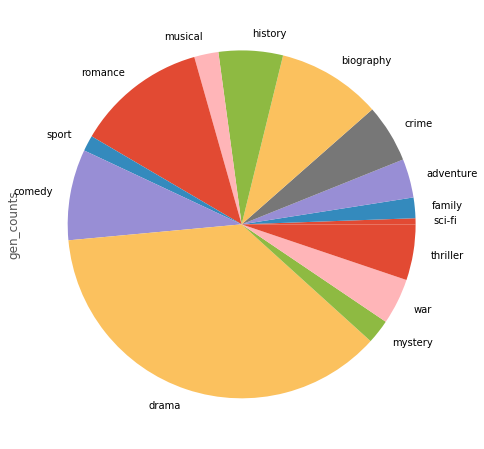

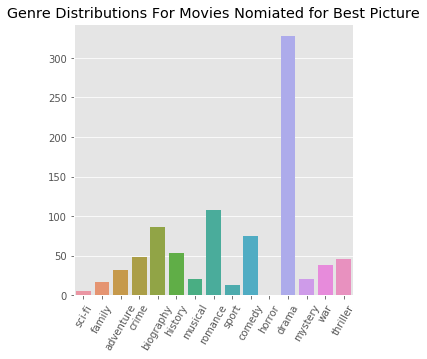

In [85]:
genres = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']

df = pd.DataFrame({'gens':gens, 'gen_counts':gen_counts})
df['gen_counts'].plot(kind='pie', labels= df['gens'],figsize=(16,8))


df = DF_main[DF_main.picture != 'O']
gens = []
gen_counts = []
for g in genres:
    gens.append(g)
    gen_counts.append(df[g].sum())
print(gens)
print(gen_counts)
plt.figure(figsize = (5,5))
ax = sns.barplot(x=gens, y=gen_counts)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title('Genre Distributions For Movies Nomiated for Best Picture')

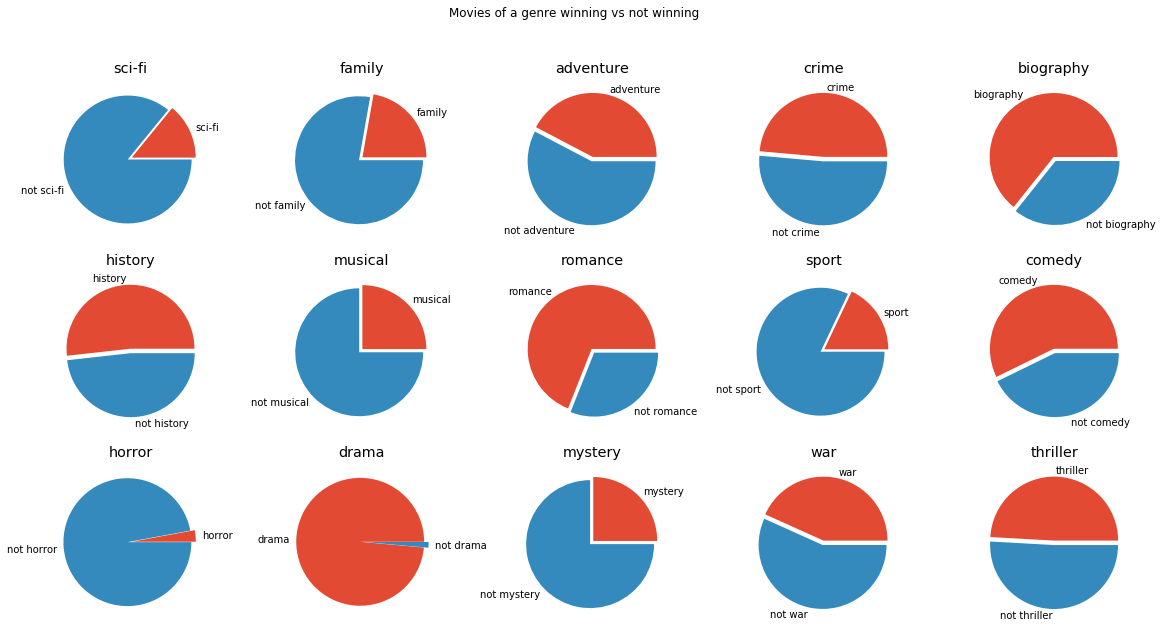

In [15]:
# Do Nominees have to be a Drama of some form?

genres = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']
gens = []
gen_counts = []
non_gen_counts = []
plt.figure(figsize = (20,10))
for i,g in enumerate(genres):
    gens.append(g)
    
    # Number of movies from this genre that got nominated
    df = DF_main[DF_main[g] == 1]
    gen_counts.append(df[df.picture != 'W'].picture.count())
    x = df[df.picture != 'O'].picture.count()
    strx = g
    
    # Number of movies with this genre removed that got nominated
    df = DF_main[DF_main[g] == 0]
    non_gen_counts.append(df[df.picture == 'W'].picture.count())
    y = df[df.picture == 'W'].picture.count()
    stry = 'not ' + g
    
    # plt.subplot(3,5,i)
    # plt.figure()
    plt.subplot(3,5,i+1)
    plt.pie([x,y], labels = [strx, stry], explode = [0.02, 0.05])
    plt.title(g)
    plt.suptitle('Movies of a genre winning vs not winning')
    

# print(gens)
# print(gen_counts)
# print(non_gen_counts)


Text(0.5, 1.0, 'Genre distribution for all movies')

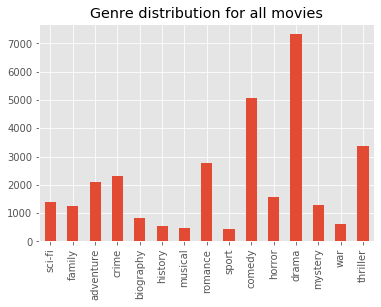

In [15]:
df = DF_main[genres]
df = df.sum(axis = 0)
df.plot(kind = 'bar')
plt.title('Genre distribution for all movies')

## 5.2.1 Most Popular Genres with Audiences

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 2369 to 13955
Data columns (total 2 columns):
imdb_rating    960 non-null float64
genre          960 non-null object
dtypes: float64(1), object(1)
memory usage: 22.5+ KB


Text(0.5, 1.0, 'IMDB Ratings for Various Genres')

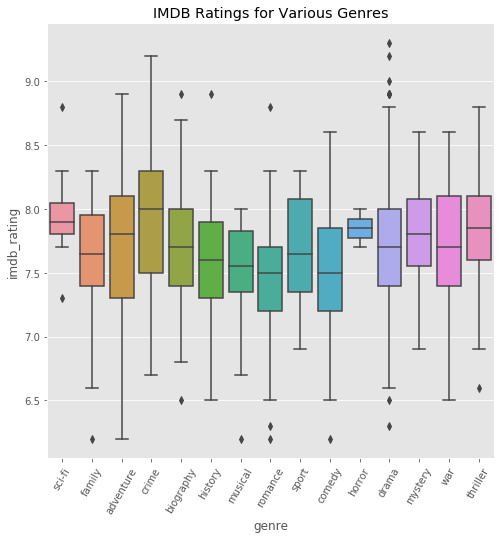

In [7]:
# IMDB Ratings
DF_main = pd.read_csv('my_data/df_main_FINAL.csv', index_col=[0])

genres = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']
df = DF_main[DF_main.picture != 'O']
DF = pd.DataFrame()

for g in genres:
    temp = df[df[g]==1][['imdb_rating']]
    temp['genre'] = g
    DF = DF.append(temp)

DF.info()
set(DF.genre.values)

plt.figure(figsize = (8,8))
ax = sns.boxplot(x="genre", y="imdb_rating", data=DF)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title('IMDB Ratings for Various Genres')

## Do Oscar-winning Films recieve higher ratings from fans?

Text(0.5, 1.0, 'Movie Ratings: W vs N')

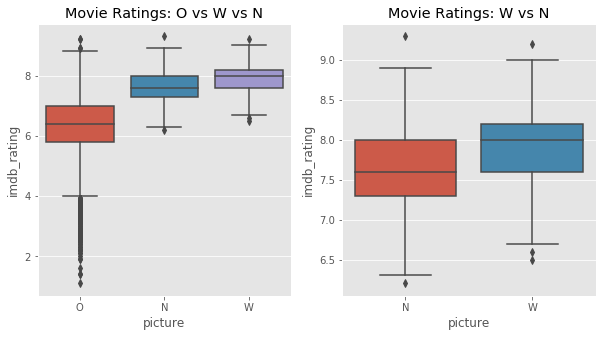

In [83]:
# IMDB Ratings
df = DF_main[DF_main.picture!='O'][['imdb_rating','picture']]
df = DF_main[['imdb_rating','picture']]
df.head()

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x="picture", y='imdb_rating', data=df)
plt.title('Movie Ratings: O vs W vs N')

df = DF_main[DF_main.picture!='O'][['imdb_rating','picture']]
df.head()
plt.subplot(1,2,2)
ax = sns.boxplot(x="picture", y='imdb_rating', data=df)
plt.title('Movie Ratings: W vs N')

## Are Oscar Winning Films Longer
We checked to see if Oscar winning films tended to be longer than those that did not win.

Text(0.5, 1.0, 'Movie Ratings: W vs N')

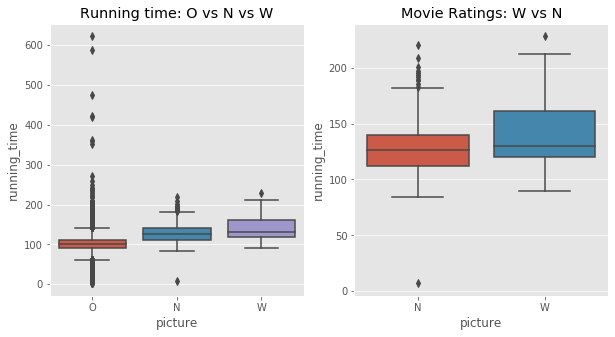

In [81]:
# Running time

df = DF_main[DF_main.picture!='O'][['running_time','picture']]
df = DF_main[['running_time','picture']]
df.head()

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x="picture", y='running_time', data=df)
plt.title('Running time: O vs N vs W')

df = DF_main[DF_main.picture!='O'][['running_time','picture']]
df.head()
plt.subplot(1,2,2)
ax = sns.boxplot(x="picture", y='running_time', data=df)
plt.title('Movie Ratings: W vs N')



# df = DF_main[DF_main.picture!='O'][['running_time','picture']]
# df = DF_main[['running_time','picture']]
# df.head()
# ax = sns.boxplot(x="picture", y='running_time', data=df)
# plt.title('Running Time: Wins vs Nominated')

## 5.3 Ranking the Best Films
Films were ranked by aggregating the Oscar score and the imdb ratings obtained from the IMDB website. The **size** of the bubble reflects the box office success of each movie. 


### 5.3.1 The Best Comedies

In [26]:
df.columns

Index(['Unnamed: 0', 'imdbID', 'title', 'year', 'n_votes', 'imdb_rating',
       'metscore', 'rotten_tomatoes', 'budget', 'box_office', 'cast_size',
       'genre_span', 'running_time', 'other_wins', 'other_noms',
       'opening_weekend', 'gross_box_office', 'precount_wins', 'precount_noms',
       'win', 'nom', 'action', 'animation', 'news', 'reality-tv', 'sci-fi',
       'family', 'adventure', 'crime', 'film-noir', 'short', 'biography',
       'history', 'western', 'fantasy', 'musical', 'romance', 'talk-show',
       'sport', 'comedy', 'horror', 'drama', 'mystery', 'documentary', 'war',
       'game-show', 'thriller', 'actor', 'actress', 'cinematography',
       'costume', 'director', 'editing', 'effects', 'music', 'picture',
       's_actor', 's_actress', 'screenplay', 'song', 'sound'],
      dtype='object')

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,one flew over the cuckoo's nest,1975,25.20,8.7,219.240,163.25,303.438662
1,forrest gump,1994,20.20,8.8,177.760,678.20,457.624831
2,terms of endearment,1983,23.00,7.4,170.200,108.40,108.835341
3,rain man,1988,20.00,8.0,160.000,354.80,299.915469
4,shakespeare in love,1998,20.40,7.1,144.840,289.30,177.484663
5,green book,2018,15.20,8.2,124.640,323.50,128.829543
6,the artist,2011,15.35,7.9,121.265,133.40,59.304967
7,birdman or (the unexpected virtue of ignorance),2014,15.60,7.7,120.120,103.20,43.592863
8,driving miss daisy,1989,15.40,7.4,113.960,145.80,117.580645
9,my fair lady,1964,14.60,7.8,113.880,72.70,234.516129


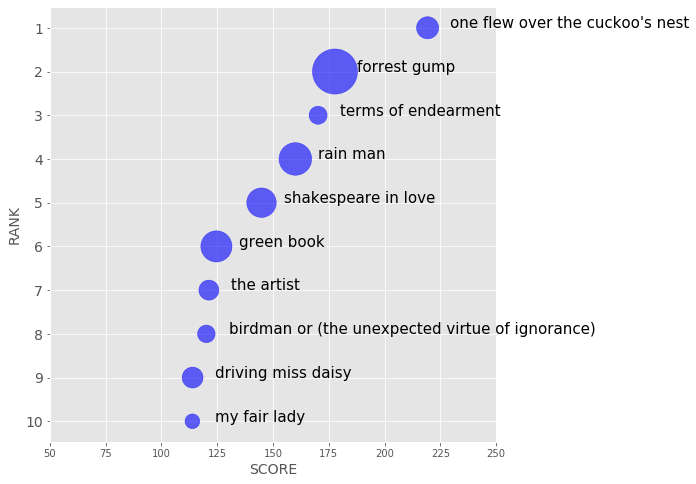

In [32]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
N = 10
df2 = df[df.com == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(N)
x = plot_n_sort(df2, N, size_factor = 3, fontsize=14, figsize = (8,8))
x.sort_values(by = 'result', ascending=False).head(N)

### 5.3.2 The Best Romance Movies

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,forrest gump,1994,20.20,8.8,177.760,678.20,457.624831
1,shakespeare in love,1998,20.40,7.1,144.840,289.30,177.484663
2,west side story,1961,19.20,7.5,144.000,44.10,147.491639
3,the artist,2011,15.35,7.9,121.265,133.40,59.304967
4,slumdog millionaire,2008,15.00,8.0,120.000,377.89,175.515436
5,the piano,1993,15.40,7.6,117.040,140.00,96.885813
6,coming home,1978,15.80,7.3,115.340,36.00,55.214724
7,the english patient,1996,15.50,7.4,114.700,232.00,147.864882
8,annie hall,1977,14.20,8.0,113.600,38.30,63.201320
9,out of africa,1985,15.40,7.2,110.880,227.50,211.431227


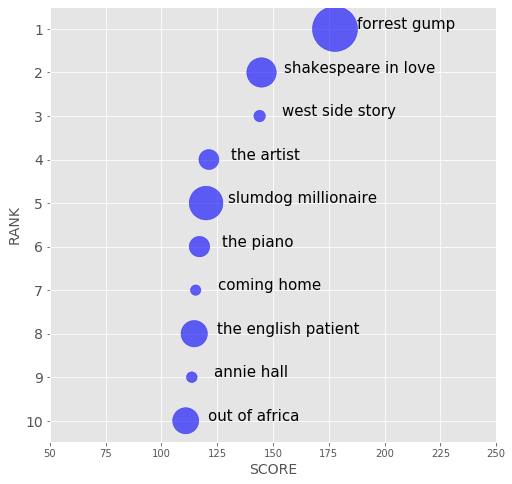

In [33]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
N = 10
df2 = df[df.rom == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(N)
x = plot_n_sort(df2, N, size_factor = 3, fontsize=14, figsize = (8,8))
x.sort_values(by = 'result', ascending=False).head(N)

### 5.3.3 The Best Biographies

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,the king's speech,2010,20.45,8.0,163.60,414.2,189.951205
1,gandhi,1982,20.00,8.0,160.00,127.8,132.435233
2,amadeus,1984,19.00,8.3,157.70,52.0,50.048123
3,a beautiful mind,2001,19.20,8.2,157.44,313.0,176.736307
4,a man for all seasons,1966,20.40,7.7,157.08,28.4,87.654321
5,schindler's list,1993,15.40,8.9,137.06,322.1,222.906574
6,the pianist,2002,15.20,8.5,129.20,120.1,66.759311
7,12 years a slave,2013,15.60,8.1,126.36,187.7,80.572810
8,green book,2018,15.20,8.2,124.64,323.5,128.829543
9,patton,1970,15.00,7.9,118.50,61.8,159.278351


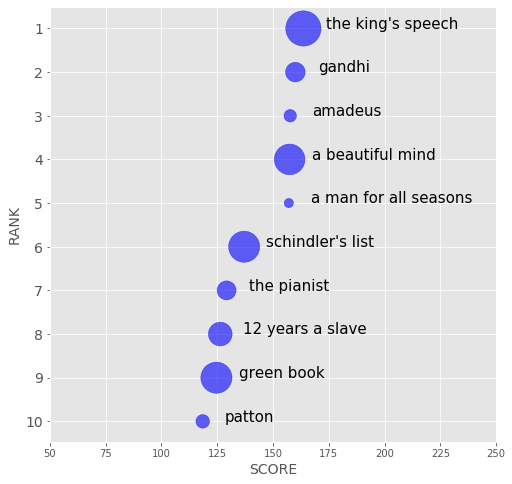

In [34]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
N = 10
df2 = df[df.bio == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(N)
x = plot_n_sort(df2, N, size_factor = 3, fontsize=14, figsize = (8,8))
x.sort_values(by = 'result', ascending=False).head(N)

### 5.3.4 The Best Movies of all time (all genres combined)

,imdbID,title,year,postscore,imdb_rating,result
0,tt0073486,one flew over the cuckoo's nest,1975,25.2,8.7,219.24
1,tt0102926,the silence of the lambs,1991,24.0,8.6,206.40
2,tt0109830,forrest gump,1994,20.2,8.8,177.76
3,tt0169547,american beauty,1999,20.2,8.3,167.66
4,tt0071562,the godfather part ii,1974,18.4,9.0,165.60


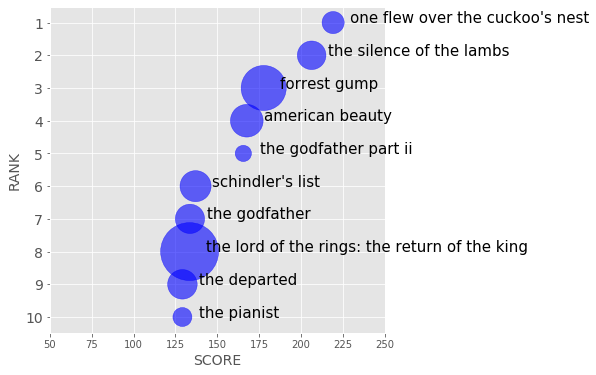

In [35]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])

df = pd.merge(df_score, df_movies)
df1 = df.sort_values(by="imdb_rating", ascending=False)
df1.head()

df2 = df.sort_values(by="postscore", ascending=False)
df2.head()
N = 2000
df3 = pd.merge(df1.head(N),df2.head(N)).query("postscore > 12")
df3['result'] = df3.postscore*df3.imdb_rating
df2 = df3[['imdbID','title','year','postscore', 'imdb_rating','result']].head(10).sort_values(by='result', ascending=False)
x = plot_n_sort(df2, 10, size_factor = 3, fontsize=14, figsize = (6,6))
x.drop(['box_office', 'box_office_adjusted'],axis=1).sort_values(by = 'result', ascending=False).head(5)

## 5.4 Corrleations between Oscar Performance and Budget, Box Office and IMDB Ratings
Our next step was to visually explore the relationship between budget, box office, IMDB ratings and the Oscar scores. 

Text(0, 0.5, 'BOX OFFICE')

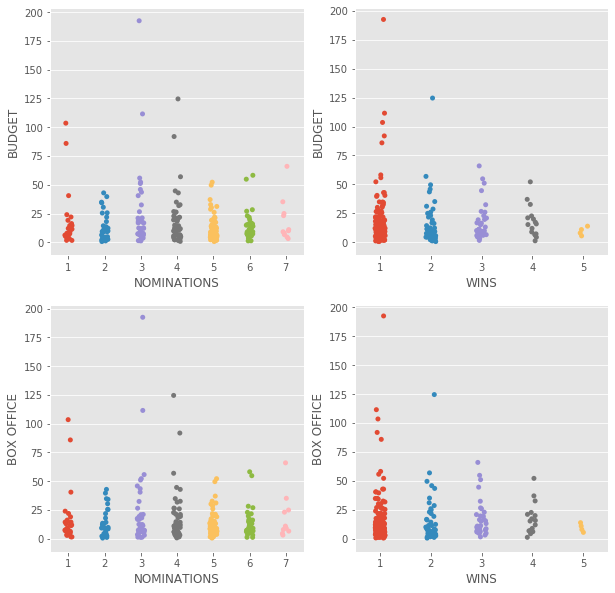

In [36]:
df_movies_main = pd.read_csv('my_data_4/DF_MEGA.csv',index_col=[0])
df_movies_main = df_movies_main[df_movies_main.win > 0]
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.stripplot(x='nom', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('BUDGET')

plt.subplot(2,2,2)
sns.stripplot(x='win', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('BUDGET')

plt.subplot(2,2,3)
sns.stripplot(x='nom', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('BOX OFFICE')

plt.subplot(2,2,4)
sns.stripplot(x='win', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('BOX OFFICE')


Text(0, 0.5, 'IMDB SCORE')

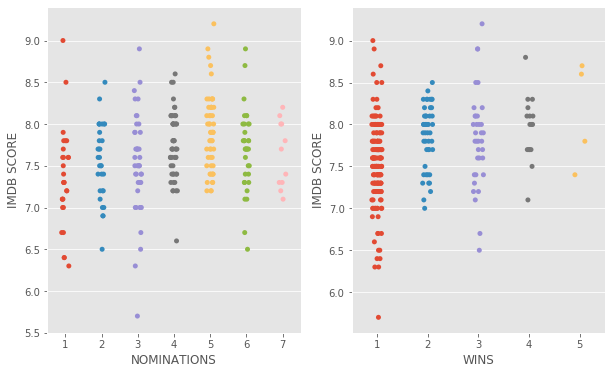

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.stripplot(x='nom', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('IMDB SCORE')

plt.subplot(1,2,2)
sns.stripplot(x='win', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('IMDB SCORE')


## 5.4 Correlation Between IMDB Score and Caste Size and Genre Span

Text(0, 0.5, 'IMDB SCORE')

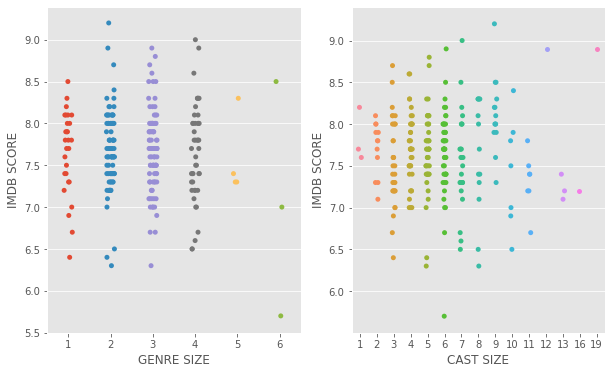

In [38]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.stripplot(x='genre', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('GENRE SIZE')
plt.ylabel('IMDB SCORE')

plt.subplot(1,2,2)
sns.stripplot(x='cast', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('CAST SIZE')
plt.ylabel('IMDB SCORE')

# 6.0 Learning and Predictive Modeling <a class="anchor" id="predict"></a>

Because we are interested onmly in the ranking and not in the absolute value of any attribute, each feature was normalized between 0 and 1 using a percentile function that reflected the rank of each film according to its score, budget, box office earnings etc. 

In [50]:
# scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

# Code

In [51]:
DF_main = pd.read_csv('my_data/df_main_FINAL.csv', index_col=[0])
all_genres = pickle.load(open("my_data/all_genres_FINAL","rb"))
oscar_categories = pickle.load(open("my_data/major_oscar_categories","rb"))
oscar_genres_columns = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']



ID_columns = ['imdbID', 'title', 'year']
basic_columns = ['cast_size', 'genre_span']

    
print("Oscar genres:\n",oscar_genres_columns)
print("Oscar categories:\n", oscar_categories)



scores = ['n_votes','imdb_rating', 'metscore', 'rotten_tomatoes']
awards_pre = ['precount_wins', 'precount_noms', 'other_wins', 'other_noms']
awards_post = ['win', 'nom']

predictor_columns = basic_columns + oscar_genres_columns + scores + awards_pre

print("Predictor columns:\n",predictor_columns)
target_columns = ['win', 'nom']
filters = ((DF_main.drama==1)|((DF_main.comedy==1)|(DF_main.romance==1)|(DF_main.biography==1)))&(DF_main.action==0)
DF_main = DF_main[filters]


# Normalize
print(DF_main.columns)
normalize_columns = ['n_votes', 'imdb_rating', 'metscore', 'rotten_tomatoes',
                     'cast_size', 'genre_span', 'cast_size', 'running_time']
DF = normalize_by_year(DF_main, predictor_columns, 'max')
DF.fillna('0',inplace=True)


In [54]:
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


# Pre 2019 (predictor) movies

# Predictor matrix
DF1 = DF[(DF.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)

#Target matrix
awards_map = {'W':1, 'N':1, 'WN':1, 'O':0}
category = 'picture'
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

# Performance tracking
name = []
accuracy = []
recall = []
precision = []

X_2019 shape: (192, 25)
X shape: (8981, 25)
y shape: (8981, 1)
X_2019 shape: (192, 25)
Class 0: 6082
Class 1: 204
2019:


## 6.1 Logistic Regression

Because we are interested in obtaining probabilities for each film earning a nomination, and inferring the winner from these probabilities, the only linear model that was considered was Logistic Regression. Because Logistic regression uses the logistic function to model a binary dependent variable, the output of the model can be naturally interpreted as the probability of nomination or not. 

{'C': 7.742636826811269, 'penalty': 'l2'}
              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99      2607
     class 1       0.72      0.55      0.62        88

    accuracy                           0.98      2695
   macro avg       0.85      0.77      0.80      2695
weighted avg       0.98      0.98      0.98      2695

Confusion Matrix:
 [[2588   19]
 [  40   48]]
Accuracy: 0.9817392272575437
Precision: 0.7164179104477612
['logreg'] [0.9817392272575437] [0.7164179104477612]


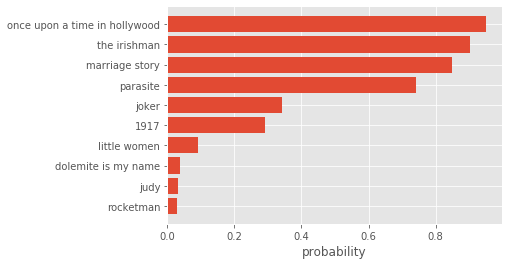

In [55]:
log = LogisticRegression(random_state=0)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
log_cv = GridSearchCV(log, hyperparameters, cv=5, verbose=0)
log_cv.fit(X, y)
y_pred = log_cv.predict(X_2019)
y_prob = log_cv.predict_proba(X_2019)[:,1]
DFX_2019.loc[:,'predicted_probability_log'] = y_prob
x = DFX_2019.sort_values(by='predicted_probability_log', ascending=False).head(10)
clear_output()

### Performance evaluation
log_cv.fit(X_train, y_train)
y_pred = log_cv.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
x = x.iloc[::-1,:]
print(log_cv.best_params_)

plt.barh(x['title'], x['predicted_probability_log'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

acc_score = log_cv.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('logreg')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)

## 6.2 K Nearest neighbors classifier 
K nearest neighbor is a nonlinear classifier that provided straightforward approach to classify movies based on their proximity to previous winners and nominees. We used GridSearchCV() method from the utils package of scikit-learn module. Although several variations were available, we only performed grid search on the number parameters, whose optimal value was found to be 15. 

{'n_neighbors': 3}
0.980625765504955
              precision    recall  f1-score   support

     class 0       0.98      0.99      0.98      2607
     class 1       0.58      0.34      0.43        88

    accuracy                           0.97      2695
   macro avg       0.78      0.67      0.71      2695
weighted avg       0.96      0.97      0.97      2695

Confusion Matrix:
 [[2585   22]
 [  58   30]]
Accuracy: 0.980625765504955
Precision: 0.5769230769230769
['logreg', 'knn'] [0.9817392272575437, 0.980625765504955] [0.7164179104477612, 0.5769230769230769]


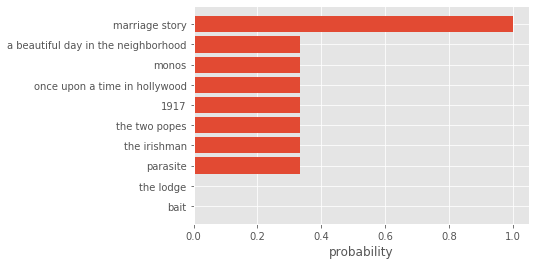

In [56]:
# KNN Training
knn = KNeighborsClassifier(n_neighbors=5)
param_grid = {'n_neighbors': np.arange(1, 30)} 
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
# knn.fit(X, y) 
knn_cv.fit(X, y)

# KNN prediction
y_pred = knn_cv.predict(X_2019)
y_prob = knn_cv.predict_proba(X_2019)
DFX_2019.loc[:,'predicted_probability_knn'] = y_prob[:,1]
x = DFX_2019.sort_values(by='predicted_probability_knn', ascending=False).head(10)
clear_output()


### Performance evaluation
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
x = x.iloc[::-1,:]
print(knn_cv.best_params_)
print(knn_cv.score(X, y))
plt.barh(x['title'], x['predicted_probability_knn'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


acc_score = knn_cv.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('knn')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)


## 6.3 Random Forest Classifier

Next, we use a popular ensemble method, the Random Forest algorithm which is known to prevent overfitting. 

{'n_estimators': 50}
              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99      2607
     class 1       0.72      0.55      0.62        88

    accuracy                           0.98      2695
   macro avg       0.85      0.77      0.80      2695
weighted avg       0.98      0.98      0.98      2695

Confusion Matrix:
 [[2588   19]
 [  40   48]]
Accuracy: 0.9932078833092083
Precision: 0.7164179104477612
['logreg', 'knn', 'rfc'] [0.9817392272575437, 0.980625765504955, 0.9932078833092083] [0.7164179104477612, 0.5769230769230769, 0.7164179104477612]


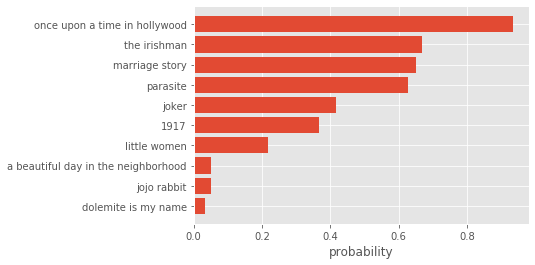

In [57]:
rfc=RandomForestClassifier() # n_estimators=100)
param_grid = {'n_estimators': np.arange(50,100,5)} 
rfc_cv = GridSearchCV(rfc, param_grid, cv=5) 

rfc_cv.fit(X,y)
y_pred = rfc_cv.predict(X_2019)
y_prob = rfc_cv.predict_proba(X_2019)
DFX_2019.loc[:,'predicted_probability_rfc'] = y_prob[:,1]
x = DFX_2019.sort_values(by='predicted_probability_rfc', ascending=False).head(10)

### Performance evaluation
rfc_cv.fit(X_train, y_train)
y_pred = rfc_cv.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
x = x.iloc[::-1,:]
print(rfc_cv.best_params_)
plt.barh(x['title'], x['predicted_probability_rfc'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


acc_score = rfc_cv.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('rfc')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)



## 6. 4 Bagging with K Nearest Neighbors

We use the bag of K-Nearest Neighbor classifiers. 

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99      2607
     class 1       0.76      0.28      0.41        88

    accuracy                           0.97      2695
   macro avg       0.87      0.64      0.70      2695
weighted avg       0.97      0.97      0.97      2695

Confusion Matrix:
 [[2599    8]
 [  63   25]]
Accuracy: 0.9766173031956352
Precision: 0.7575757575757576
['logreg', 'knn', 'rfc', 'bag'] [0.9817392272575437, 0.980625765504955, 0.9932078833092083, 0.9766173031956352] [0.7164179104477612, 0.5769230769230769, 0.7164179104477612, 0.7575757575757576]


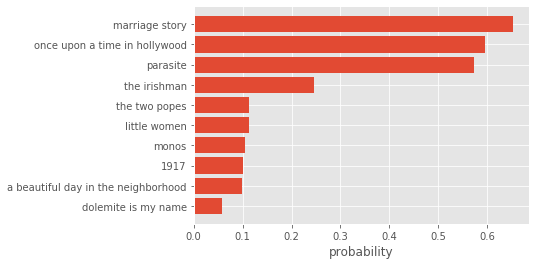

In [58]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=100, random_state=42)
bag.fit(X, y)
y_pred = bag.predict(X_2019)
y_prob = bag.predict_proba(X_2019)
DFX_2019.loc[:,'predicted_probability_bag'] = y_prob[:,1]
clear_output()
x = DFX_2019.sort_values(by='predicted_probability_bag', ascending=False).head(10)


### Performance evaluation
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
x = x.iloc[::-1,:]
# print(bag.best_params_)
plt.barh(x['title'], x['predicted_probability_bag'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


acc_score = bag.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('bag')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)


## 6.5 Adaboost Classifier

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      2607
     class 1       0.65      0.60      0.62        88

    accuracy                           0.98      2695
   macro avg       0.82      0.80      0.81      2695
weighted avg       0.98      0.98      0.98      2695

Confusion Matrix:
 [[2578   29]
 [  35   53]]
Accuracy: 0.9841888431132391
Precision: 0.6463414634146342
['logreg', 'knn', 'rfc', 'bag', 'ada'] [0.9817392272575437, 0.980625765504955, 0.9932078833092083, 0.9766173031956352, 0.9841888431132391] [0.7164179104477612, 0.5769230769230769, 0.7164179104477612, 0.7575757575757576, 0.6463414634146342]


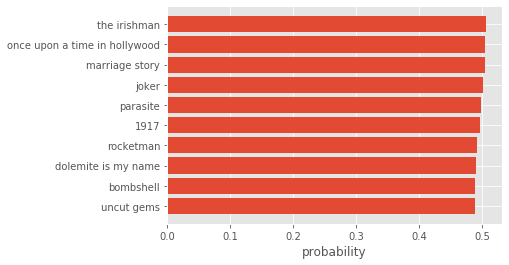

In [59]:
ada = AdaBoostClassifier(n_estimators=100, random_state=47)
ada.fit(X, y)
y_pred = ada.predict(X_2019)
y_prob = ada.predict_proba(X_2019)

DFX_2019.loc[:,'predicted_probability_ada'] = y_prob[:,1]
clear_output()
print(ada.score(X,y))
x = DFX_2019.sort_values(by='predicted_probability_ada', ascending=False).head(10)
# print(bag.best_params_)
x = x.iloc[::-1,:]


### Performance evaluation
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
# print(ada.best_params_)
plt.barh(x['title'], x['predicted_probability_ada'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

acc_score = ada.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('ada')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)


## 6.6 Neural Network or Multi Layer Perceptron
We use a neural network with 1 hidden layer comprising of 10 neurons 

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      2607
     class 1       0.71      0.64      0.67        88

    accuracy                           0.98      2695
   macro avg       0.85      0.81      0.83      2695
weighted avg       0.98      0.98      0.98      2695

Confusion Matrix:
 [[2584   23]
 [  32   56]]
Accuracy: 0.9799576884534016
Precision: 0.7088607594936709
['logreg', 'knn', 'rfc', 'bag', 'ada', 'mlp'] [0.9817392272575437, 0.980625765504955, 0.9932078833092083, 0.9766173031956352, 0.9841888431132391, 0.9799576884534016] [0.7164179104477612, 0.5769230769230769, 0.7164179104477612, 0.7575757575757576, 0.6463414634146342, 0.7088607594936709]


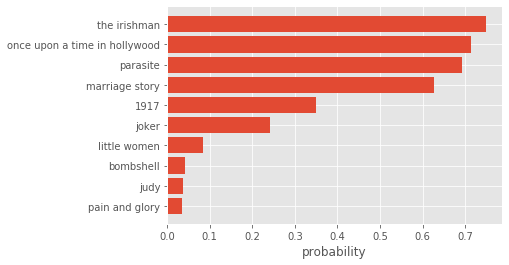

In [60]:
mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,10), max_iter=1000, random_state=41)
mlp.fit(X, y)
y_pred = mlp.predict(X_2019)
y_prob = mlp.predict_proba(X_2019)
# print(y_prob)
# print(classifier.score)
DFX_2019.loc[:,'predicted_probability_mlp'] = y_prob[:,1]
clear_output()
print(mlp.score(X, y))
x = DFX_2019.sort_values(by='predicted_probability_mlp', ascending=False).head(10)
x = x.iloc[::-1,:]


### Performance evaluation
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
target_names = ['class 0', 'class 1']
clear_output() 
plt.barh(x['title'], x['predicted_probability_mlp'])
plt.xlabel('probability')
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

acc_score = mlp.score(X, y)
prec_score = precision_score(y_test, y_pred, labels= 'class 1')
print("Accuracy:", acc_score)
print("Precision:",prec_score)
name.append('mlp')
precision.append(prec_score)
accuracy.append(acc_score)
print(name, accuracy, precision)

# 6.7 The Final Prediction of Nomination <a class="anchor" id="final_predict"></a>


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

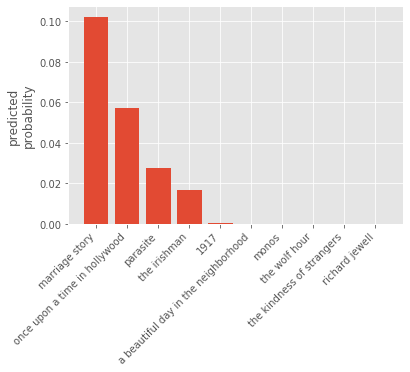

In [65]:
performance_df = pd.DataFrame({'classifier': name, 'accuracy':accuracy, 'precision':precision})
performance_df.set_index('classifier', inplace=True)

field = 'accuracy'
DFX_2019['final_proba'] = 1
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_log']*performance_df.loc['logreg',field] 
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_knn']*performance_df.loc['knn',field] 
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_rfc']*performance_df.loc['rfc',field] 
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_bag']*performance_df.loc['bag',field] 
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_ada']*performance_df.loc['ada',field] 
DFX_2019['final_proba'] = DFX_2019['final_proba'] * DFX_2019['predicted_probability_mlp']*performance_df.loc['mlp',field] 



 

DFX_2019.columns
x = DFX_2019.sort_values(by='final_proba', ascending=False).head(10)
# print(bag.best_params_)
# x = x.iloc[::-1,:]
plt.bar(x['title'], x['final_proba'])
plt.xticks(rotation=90)
plt.ylabel('predicted\nprobability')
plt.xticks(rotation=45, horizontalalignment = 'right')



# 7.0 Predicting Winners<a class="anchor" id="predict_winners"></a>


We will now use the 4 most successful models to predict the winner in all the major categories. 

In [18]:
# import necessary libraries
import pandas as pd
import collections
import numpy as np
import requests
import wikipedia
import nbconvert
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapy import selector
import datetime as dt
import pickle
from skimage import io
from IPython.display import clear_output
%matplotlib inline

# scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

import tensorflow as tf


In [69]:
DF_main = pd.read_csv('my_data/df_main_FINAL.csv', index_col=[0])
all_genres = pickle.load(open("my_data/all_genres_FINAL","rb"))
oscar_categories = pickle.load(open("my_data/major_oscar_categories","rb"))
oscar_genres_columns = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']



ID_columns = ['imdbID', 'title', 'year']
basic_columns = ['cast_size', 'genre_span']

    
print("Oscar genres:\n",oscar_genres_columns)
print("Oscar categories:\n", oscar_categories)



scores = ['n_votes','imdb_rating', 'metscore', 'rotten_tomatoes']
awards_pre = ['precount_wins', 'precount_noms', 'other_wins', 'other_noms']
awards_post = ['win', 'nom']

predictor_columns = basic_columns + oscar_genres_columns + scores + awards_pre

print("Predictor columns:\n",predictor_columns)
target_columns = ['win', 'nom']
filters = ((DF_main.drama==1)|((DF_main.comedy==1)|(DF_main.romance==1)|(DF_main.biography==1)))&(DF_main.action==0)
DF_main = DF_main[filters]
# DF_main.drop('action', axis=1, inplace=True)

seed = 139

Oscar genres:
 ['sci-fi', 'family', 'adventure', 'crime', 'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 'horror', 'drama', 'mystery', 'war', 'thriller']
Oscar categories:
 ['picture', 'director', 's_actor', 's_actress', 'actor', 'actress', 'screenplay']
Predictor columns:
 ['cast_size', 'genre_span', 'sci-fi', 'family', 'adventure', 'crime', 'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 'horror', 'drama', 'mystery', 'war', 'thriller', 'n_votes', 'imdb_rating', 'metscore', 'rotten_tomatoes', 'precount_wins', 'precount_noms', 'other_wins', 'other_noms']


In [70]:
def convert_to_pctile(X, columns):
    
    for col in columns:
        x = np.array(X[col])
        X[col] = [(len(np.where(x<=y)[0])/len(x)) for y in x]
    return X

def normalize_by_max(X, columns):
    for col in columns:
        x = np.array(X[col])
        mx = np.max(x)
        X[col] = x/mx
    return X

def top_N_each_year(df,N,feature):
    df_ = pd.DataFrame()
    for year in list(set(df.year)):
        # print(year)
        df_ = df_.append(df[df.year == year].sort_values(by = feature, ascending=False).head(N))
    return df_

def normalize_by_year(df, columns, _how = 'max'):
    
    if type(columns)!= list:
        print("columns must be list")
        return dict()
    years = list(set(df.year))

    print(years)
    
    if _how == 'pctile':
        df = convert_to_pctile(df, columns)
        return df

    for column in columns:
        cols = ['year'] + [column]
        for year in years:
            if year%10 == 0:
                clear_output() 
            print(year, column)
            temp_df = df[(df.year == year)]
            temp_df = temp_df[column]
            ids = temp_df.index
            
            if _how == 'max':
                df.loc[ids,column] = df.loc[ids,column]/temp_df.max()
            if _how == 'minmax':
                min_max_scaler = preprocessing.MinMaxScaler()
                vals = df.loc[ids,column].values
                # vals.shape = (len(vals),1)
                print(vals.shape)
                vals = vals[:,np.newaxis]
                print(vals.shape)
                scaled_array = min_max_scaler.fit_transform(vals)
                df.loc[ids,column] = scaled_array
            
                
    return df

In [21]:
print(DF_main.columns)
normalize_columns = ['n_votes', 'imdb_rating', 'metscore', 'rotten_tomatoes',
                     'cast_size', 'genre_span', 'cast_size', 'running_time']
# DF = normalize_by_year(DF_main, normalize_columns, 'max')
DF_main = normalize_by_year(DF_main, normalize_columns, 'max')

2010 running_time
2011 running_time
2012 running_time
2013 running_time
2014 running_time
2015 running_time
2016 running_time
2017 running_time
2018 running_time
2019 running_time


In [93]:
np.random.randint(500)

262

In [128]:

def bag_predict(X, y, X_2019, my_model, name):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= seed, stratify = y)

#     my_model = LogisticRegression(random_state=49)
#     my_model = RandomForestClassifier(random_state= seed)



    model = BaggingClassifier(base_estimator=my_model, n_estimators=100, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X_2019)
    y_prob = model.predict_proba(X_2019)[:,1]
    DFX_2019.loc[:,'predicted_probability_'+name] = y_prob
    x = DFX_2019.sort_values(by='predicted_probability_'+name, ascending=False)

    ### Performance evaluation and plot
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    target_names = ['class 0', 'class 1']
    clear_output() 
    # x = x.iloc[::-1,:]
    accuracy = model.score(X, y)
    precision = precision_score(y_test, y_pred, labels= 'class 1')
    confusion = confusion_matrix(y_test, y_pred)
    # print (x[['title','predicted_probability']], '\n', accuracy, precision, '\n', confusion)
    
    return x[['title','predicted_probability_'+name]], accuracy, precision, confusion


In [110]:
# Machine Learning

def all_predict(X, y, X_2019, num_models, NUM_MODELS, figsize, suptitle, num_runs = 1):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= seed, stratify = y)

    fig = plt.figure(figsize = figsize)
    fig.suptitle(suptitle, fontsize=16)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

        
    ##############################################
    ## ####################    Logreg
    
    acc_score = {}
    acc_score['log'] = []
    prec_score['log'] = []
    
    acc_score['rfc'] = []
    prec_score['rfc'] = []
    

    seed = np.random.randint(500)
    model = LogisticRegression(random_state=seed)
    penalty = ['l1', 'l2']
    C = np.logspace(0, 4, 10)
    hyperparameters = dict(C=C, penalty=penalty)
    model = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
    model.fit(X, y)
    y_pred = model.predict(X_2019)
    y_prob = model.predict_proba(X_2019)[:,1]
    DFX_2019.loc[:,'predicted_probability_log'] = y_prob
    x = DFX_2019.sort_values(by='predicted_probability_log', ascending=False).head(10)

    ### Performance evaluation and plot
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    target_names = ['class 0', 'class 1']
    clear_output() 
    x = x.iloc[::-1,:]
    print(model.best_params_)
    print(model.score(X, y))

    acc_sum = 0
    agg_probability_acc = np.zeros(len(x))
    agg_probability_prec = np.zeros(len(x))

    acc_score = {}
    prec_score = {}
    
    
    explode = 0.05*np.ones(len(x))
    x['predicted_probability_log'] = x['predicted_probability_log']/x['predicted_probability_log'].sum()
    ax = plt.subplot(1, 2, 1)
    # ax.pie(x['predicted_probability_log'], labels = x['title'], explode = explode)
    ax.barh(x['title'], x['predicted_probability_log'])
    ax.set_title("Logistic Regression")
    
    acc_score['log'] = model.score(X, y)
    prec_score['log'] = precision_score(y_test, y_pred, labels= 'class 1')

    ################################################################
    ##################     Random Forest Classifier
    model = RandomForestClassifier(random_state= seed) # n_estimators=100)
    param_grid = {'n_estimators': np.arange(50,100,5)} 
    model = GridSearchCV(model, param_grid, cv=5) 
    
    model.fit(X, y)
    y_pred = model.predict(X_2019)
    y_prob = model.predict_proba(X_2019)[:,1]
    DFX_2019.loc[:,'predicted_probability_rfc'] = y_prob
    x = DFX_2019.sort_values(by='predicted_probability_rfc', ascending=False).head(10)

    ### Performance evaluation and plot
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    target_names = ['class 0', 'class 1']
    clear_output() 
    x = x.iloc[::-1,:]
    print(model.best_params_)
    print(model.score(X, y))
    
    x['predicted_probability_rfc'] = x['predicted_probability_rfc']/x['predicted_probability_rfc'].sum()
    ax = plt.subplot(1, 2, 2)
    ax.barh(x['title'], x['predicted_probability_rfc'])
    # ax.pie(x['predicted_probability_rfc'], labels = x['title'], explode = explode, pctdistance=0.85)
    ax.set_title("Random Forest")
    
    acc_score['rfc'] = model.score(X, y)
    prec_score['rfc'] = precision_score(y_test, y_pred, labels= 'class 1')
    
    
    ### Normalize

    agg_probability_acc = acc_score['log']*x['predicted_probability_log'] + acc_score['rfc']*x['predicted_probability_rfc']
    agg_probability_prec = prec_score['log']*x['predicted_probability_log'] + prec_score['rfc']*x['predicted_probability_rfc']
    
    agg_probability_acc = agg_probability_acc/agg_probability_acc.sum()
    agg_probability_prec = agg_probability_prec/agg_probability_prec.sum()
    
    ################################################################
    ######### .   Plots .  ##############
    
    # Accuracy
    explode = np.zeros(len(agg_probability_acc))
    explode[np.argmax(agg_probability_acc.values)] = 0.08
    
    fig, a = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = a.pie(agg_probability_acc, 
                                     labels = x['title'],
                                     explode = explode, 
                                     autopct='%1.1f%%')
    
    
    
    # a.legend(wedges, x['title'], title="Title", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    a.set_title("Aggregate Probability Accuracy")
    plt.tight_layout()
    
    
   # Precision
    explode = np.zeros(len(agg_probability_acc))
    explode[np.argmax(agg_probability_acc.values)] = 0.08
    
    # plt.figure(figsize = (10,10))
    fig, a = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = a.pie(agg_probability_prec, 
                                     labels = x['title'],
                                     explode = explode, 
                                     autopct='%1.1f%%')
    # a.set_title("Aggregate Probability")
    # plt.tight_layout()
    
    # a.legend(wedges, x['title'], title="Title", loc="lower right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    a.set_title("Aggregate Probability Precision")
    



## 7.1 Best Picture

In [129]:
# Only consider nominees for that category
category = 'picture'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()


seed = np.random.randint(500)
model = LogisticRegression(random_state=seed)
prob_log, acc_log, prec_log, conf_log = bag_predict(X, y, X_2019, model, name = 'log')

model = RandomForestClassifier(random_state= seed)
prob_rfc, acc_rfc, prec_rfc, conf_rfc = bag_predict(X, y, X_2019, model, name = 'rfc')

# all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

In [132]:
print(acc_log, prec_log)
print(acc_rfc, prec_rfc)
prob = prob_log.merge(prob_rfc, on = 'title')
prob['agg_accuracy'] = prob['predicted_probability_log']*acc_log +prob['predicted_probability_rfc']*acc_rfc
prob['agg_precision'] = prob['predicted_probability_log']*prec_log +prob['predicted_probability_rfc']*prec_rfc

print(prob.sort_values(by = 'agg_accuracy', ascending = False))




0.7945205479452054 0.3
0.910958904109589 0.5
                           title  predicted_probability_log  \
0                       parasite                   0.134347   
7                   the irishman                   0.019450   
2                          joker                   0.073951   
4                           1917                   0.045532   
5                 marriage story                   0.040922   
1                    jojo rabbit                   0.098791   
3                   little women                   0.054390   
6  once upon a time in hollywood                   0.023781   

   predicted_probability_rfc  agg_accuracy  agg_precision  
0                      0.307      0.386406       0.193804  
7                      0.323      0.309693       0.167335  
2                      0.255      0.291050       0.149685  
4                      0.227      0.242964       0.127160  
5                      0.213      0.226548       0.118777  
1                      0.15

## 7.2 Best Director

/Users/ranitsengupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'n_estimators': 50}
0.9259259259259259


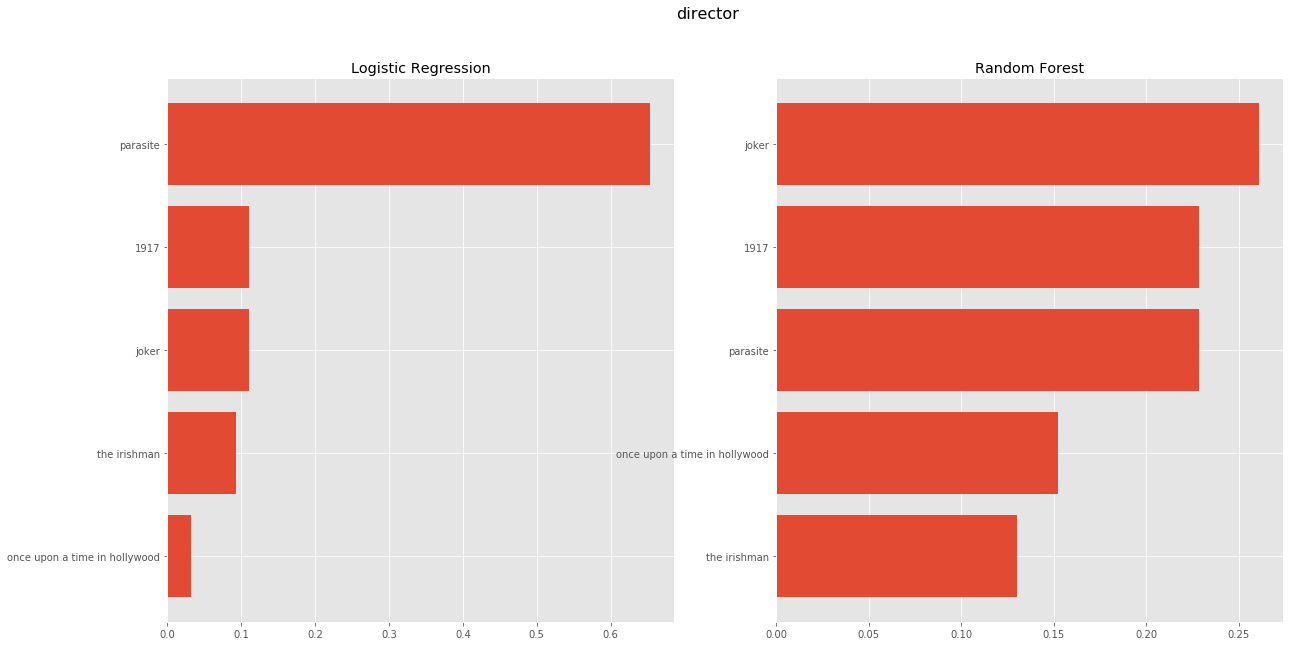

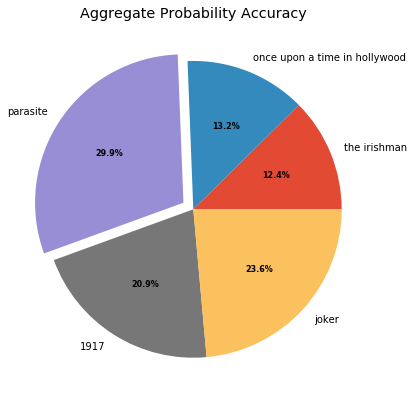

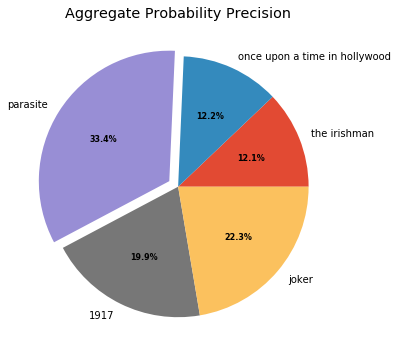

In [73]:
# Only consider nominees for that category
category = 'director'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()

all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

## 7.3 Best Actor

{'n_estimators': 50}
0.93359375


/Users/ranitsengupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


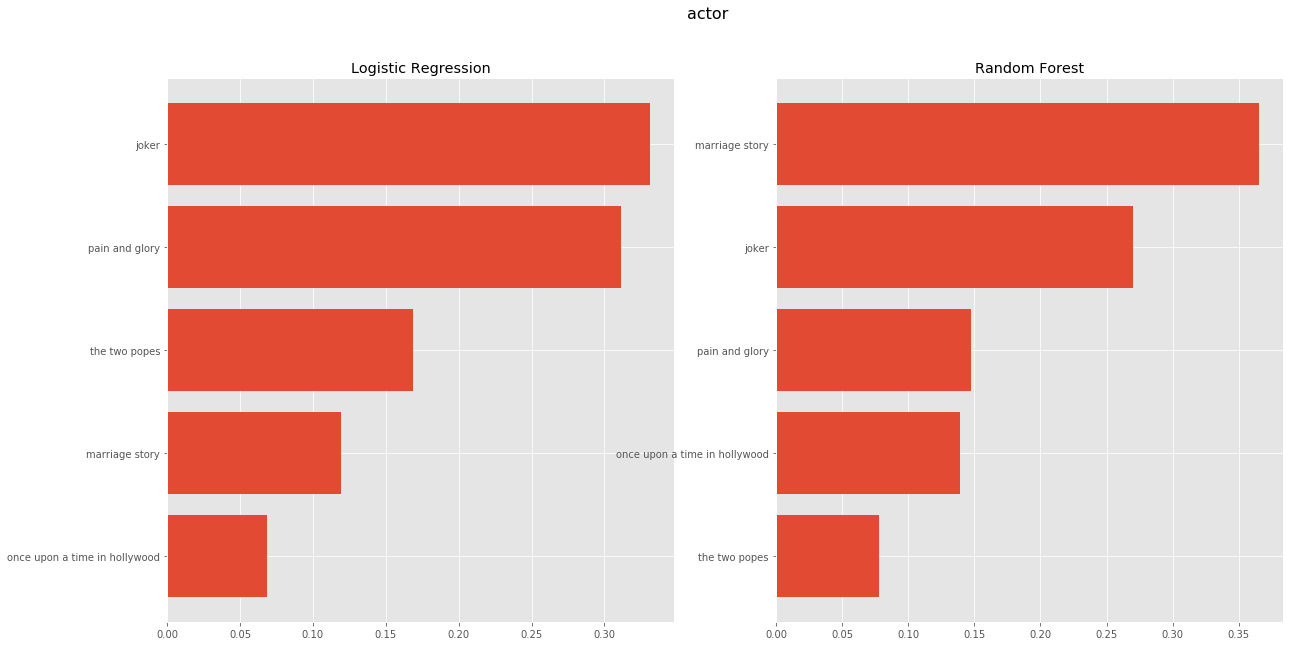

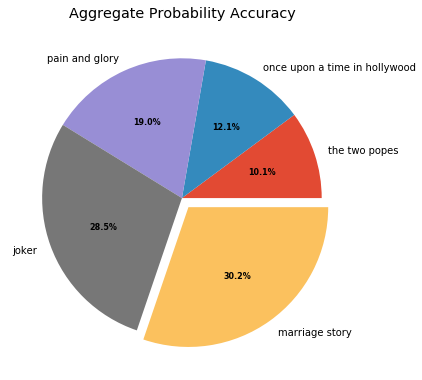

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


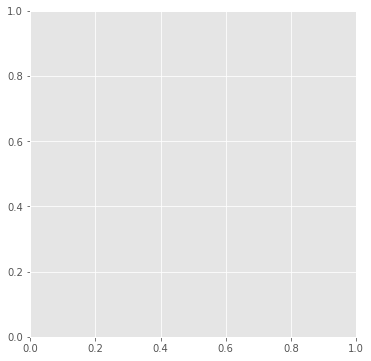

In [68]:
# Only consider nominees for that category
category = 'actor'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()

all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

## 7. 4 Best Actress

In [ ]:
# Only consider nominees for that category
category = 'actress'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()

all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

## 7.5 Best Supporting Actress

In [ ]:
# Only consider nominees for that category
category = 's_actress'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()

all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

## 7.6 Best Supporting Actor

In [ ]:
# Only consider nominees for that category
category = 's_actor'
DF = DF_main[DF_main[category]!='O']
# DF.info()

# Pre 2019 (predictor) movies
# Predictor matrix
DF1 = DF[(DF_main.year >=1960)&(DF.year < 2019)]
DFX = DF1.loc[:,ID_columns + predictor_columns + target_columns]
X = DFX[predictor_columns]
print("X shape:",X.shape)


#Target matrix
awards_map = {'W':1, 'N':0, 'WN':1}
y = DF1[category].map(awards_map).values
y = y[:,np.newaxis]
print("y shape:", y.shape)


# Now for 2019 (target) movies
DFX_2019 = DF[DF.year == 2019]
DFX_2019 = DFX_2019.loc[:,ID_columns + predictor_columns + target_columns]
X_2019 = DFX_2019[predictor_columns]
print("X_2019 shape:",X_2019.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Class 0:", len(y_train[np.where(y_train == 0)]))
print("Class 1:", len(y_train[np.where(y_train == 1)]))
print("2019:", )

DF1[category].head(10).tail()

all_predict(X, y, X_2019, 2, 2, figsize=(20,10), suptitle = category)

<a class="anchor" id="future"></a>
# 8.0 Future Directions and Improvements

The predictive power of the models may be increased in future by aggregating feedback reviews by movie fans on websites such as IMDB and Rotten Tomatoes and also from expert reviewers such as Roger Ebert. The reviews on each movie may be analyzed using tools from Natural Language Processing (NLP) and the additional information may be leveregaed to enhance the predictive power of the existing model. 


# A. List of Files<a class="anchor" id="appendix"></a>
The following files were generated and saved for the analysis and modeling. 
1. primary_list: List of all American and British movies between the years 1960 and 2019
2. movie_dict: Dictionary indexed by (title, year) (eg. ('titanic', 1997)) containing movie information
3. df_oscars_wide:
4. df_oscars_long:
5. df_individual_long:
6. df_pre_post_score:

# B. Data Acquisition Code


The following code obtains movie information from Wikipedia and OMDB using the respective APIs

In [ ]:
%%time
## This function obtains list of all British and American Movies in specified years
# primary_list = []
for year in range(1950,2020):
    print(f"In {year}")
    if year%10==0:
        clear_output()
    # Set URL
    my_url = ['List_of_American_films_of_'+ str(year), 'List_of_British_films_of_'+ str(year)]
    
    #Define empty list for the year
    
    for url in my_url:
        page = wikipedia.page(url)
        soup = BeautifulSoup(page.html(),'lxml')
        tables = soup.find_all('table', class_ = 'wikitable') # , class_="wikitable sortable jquer-tablesorter")
        for table in tables:
            films = table.find_all('i')
            for film in films:
                title = film.text
                # print(title)
                link = film.find_all('a', href=True, title = True)
                if len(link)==0:
                    continue
                else:
                    link = link[0]['href']
                primary_list.append((year,film.text.lower(),link))

        
pickle.dump(primary_list,open('my_data_4/PRIMARY_LIST_1950_2019', "wb" ))
len(primary_list)


In [30]:
# Create dictionary from Wikipedia page of the film using the INFOBOX table

def movie_infobox_dict(infobox_items, title, year):
    """Accepts an infobox item and intro sections of wikipedia page and returns a dictionary
    """
    # initialiZe empty dictionary
    _movie_dict = dict()
    _movie_dict['title']= title
    _movie_dict['year']= year
    
    # Go through each infobox item and extract information
    for item in infobox_items:
        try:
            if len(item) < 2:
                continue
            
            #director
            _movie_dict['director'] = []
            if item.th.text.lower().find('direct')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['director'].append(line.text.lower())      
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['director'].append(line.text.lower())
                if len(_movie_dict['director'])==0:
                    _movie_dict['director'] = item.td.text.split('br')
            
            #producer
            _movie_dict['producer'] = []
            if item.th.text.lower().find('produce')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['producer'].append(line.text.lower())    
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['producer'].append(line.text.lower()) 
                if len(_movie_dict['producer'])==0:
                    _movie_dict['producer'] = item.td.text.split('br')

            #cast
            _movie_dict['cast'] = []
            if item.th.text.lower().find('star')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['cast'].append(line.text.lower())
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['cast'].append(line.text.lower())
                if len(_movie_dict['cast'])==0:
                    _movie_dict['cast'] = item.td.text.split('br')

            #screenplay
            _movie_dict['screenplay'] = []
            if item.th.text.lower().find('screenplay')>-1 or item.th.text.lower().find('written')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['screenplay'].append(line.text.lower())
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['screenplay'].append(line.text.lower())
                if len(_movie_dict['screenplay'])==0:
                    _movie_dict['screenplay'] = item.td.text.split('br')

            #cinematography
            _movie_dict['cinematography'] = []
            if item.th.text.lower().find('cinematography')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['cinematography'].append(line.text.lower())
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['cinematography'].append(line.text.lower())
                if len(_movie_dict['cinematography'])==0:
                    _movie_dict['cinematography'] = item.td.text.split('br')

            # music
            _movie_dict['music'] = []
            if item.th.text.lower().find('music')>-1 or item.th.text.lower().find('score')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['music'].append(line.text.lower())
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['music'].append(line.text.lower())
                if len(_movie_dict['music'])==0:
                    _movie_dict['music'] = item.td.text.lower()
                
            # editing
            _movie_dict['edit'] = []
            if item.th.text.lower().find('edit')>-1:
                if item.td.find('div', class_="plainlist")==None: # single entries
                    for line in item.td.find_all('a'):
                        _movie_dict['edit'].append(line.text.lower())
                else:
                    for line in item.td.find('div', class_="plainlist").find_all('li'):
                        _movie_dict['edit'].append(line.text.lower())
                if len(_movie_dict['edit'])==0:
                    _movie_dict['edit'] = item.td.text.split('br')

            # Based on a book (Y/N)
            _movie_dict['book'] = '0'
            if item.th.text.lower().find('based')>-1:
                _movie_dict['book'] = '1'

            # Get budget
            if item.th.text.lower().find('budget')>-1:
                budget = item.td.text.strip()
                budget = re.sub(r'\[.+\]+', "", budget) #remove square bracket references
                _movie_dict['budget'] = currency_to_million(budget)

            # Get box office
            if item.th.text.lower().find('box')>-1:
                box_office = item.td.text.strip()
                box_office = re.sub(r'\[.+\]+', "", box_office)#remove square bracket references
                _movie_dict['box_office'] = currency_to_million(box_office)

            # Get running time
            if item.th.text.lower().find('running time')>-1:
                running_time = item.td.text.strip()
                running_time = re.findall(r'(\d+)\smin', running_time)
                if len(running_time)==0:
                    _movie_dict['running_time'] = 0
                    continue
                _movie_dict['running_time'] = int(running_time[0])

            # Language 
            if item.th.text.lower().find('language')>-1:
                language = item.td.text.strip()
                if (language.lower().find('english') == -1 and 
                    language.lower().find('silent') == -1): # film does not contain english
                    return dict()
                _movie_dict['language']= language.split('\n')

            # Release date 
            if item.th.text.lower().find('release')>-1:
                release = item.td.text.strip()
                release = re.findall(r'\d\d\d\d', release)
                if len(release)==0:
                    print(f'Year not found for {title} in {year}')
                    return dict()
                release = dt.datetime.strptime(release[0], '%Y').year
#                 if release !=year: # or len(str(release))==0:
#                     print(f'Wrong year for {title}! Corrected to wikipedia year')
#                     return dict()
#                     # _movie_dict['year']= year
#                 else:
                _movie_dict['release_year']=release


        except AttributeError:
            print(f'\tCould not fetch info for {title} from infobox items')

    return _movie_dict

#########################################################################################    
# Converts different denominations to $X.y million (eg. 3.5 for $3.5 million or 3,500,000)
def currency_to_million(money):
    ''' Accepts $12 million and returns 12000000
        Accepts $13,678,654 and reurns  13678654
        Accept $15-25 million and returns 25000000
        Accepts $2 billion and returns 2000000000
        using regular expressions
    '''
    if money == None:
        return np.nan
    if len(money)==0:
        return np.nan

    # Check to see dollar, otherwise return nan
    money = money.lower()
    if money.find('$')>-1:
        factor=1
    elif money.find('£')>-1:
        factor = 1.3
    else:
        return np.nan
    
    money = re.sub(r'\[.*\]', '', money) #remove square bracket citation

    if money.find('illion')>0: # when currency expressed in million/billion

        # Billion: $12.4 billion
        reg = r"[\$-–]([0-9.]+)\sbillion"
        num = re.findall(reg, money) # find number like $12.4 billion
        if len(num)>0:
            # num = re.sub(r'\D', "", num) # drop any non-numeric characters like comma, dash etc
            return  round(float(num[0])*1e3*factor,2)

        # Million: $6.8 million
        reg = r"[\$-–]([0-9.]+)\smillion"
        num = re.findall(reg, money) # find number like $6.8 million
        if len(num)>0:
            # num = re.sub(r'\D', "", num) # drop any non-numeric characters like comma, dash etc
            try:
                return round(float(num[0])*factor,2)
            except:
                return np.nan

    else: # When currency not expressed in millions  
        reg = r"[$£]\s?([\d,]+)[\D\s]?"
        num = re.findall(reg, money)
        if len(num) >0:
            num = re.sub(r',', '', num[0])
            try:
                return round(float(num)/1e6*factor,2)
            except:
                return np.nan

#########################################################################################    
# Get genre information from wikipedia introductory paragraph            
def get_genre(intro):
    """returns the movie genre based on wikipedia intro, returns list of genres
    """
    genre_dict = pickle.load(open("my_data_4/genre_dict","rb"))
    this_movie_genres = []
    for line in intro: # got through all the lines
        line = line.text.split('.')
        line = line[0]
        line = line.lower()
        for genre in genre_dict:
            if line.find(genre) > 0:
                this_movie_genres.append(genre_dict[genre])
        
        if len(this_movie_genres)>0:
            return list(set(this_movie_genres))
    return ['other']

#########################################################################################    

def num_awards_noms(my_str, cat):
    """Returns total number of awards and nominations
    Accepts "11 wins and 4 nominations and returns 11,4"
    """
    my_str = my_str.lower()
    if my_str.lower() == 'n/a':
        return 0
    if cat == 'w':
        my_str = my_str.lower()
        x = re.findall(r'(\d+)\sw', my_str)
        if len(x) > 0:
            return float(x[0])
        else:
            return 0
    if cat == 'n':
        my_str = my_str.lower()
        x = re.findall(r'(\d+)\sn', my_str)
        if len(x) > 0:
            return float(x[0])
        else:
            return 0
#########################################################################################    

def get_list(my_str):
    """Cleans data and gets list of writers, actors, directors, etc
    """
    my_str = my_str.lower()
    this_list = my_str.split(',')
    
    for i,element in enumerate(this_list):
        reg = r'(\(.+\))'
        this_list[i] = re.sub(reg,'',element).strip()
    return this_list


# This is the main function that calls wikiapi_film, OMDB API and ancillary functions to get the dictionaries
def get_all_movie_info(title, year, url):
    """This is the MAIN function that uses previous functions to accept title and year and return 
    all the movie information, returns dictionary
    """
    
    # Wikipedia info
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')

    # Get wikipedia infobox tables for all other information
    try:
        infobox_items = soup.find('table', class_ = 'infobox vevent').tbody.find_all('tr')
    except: 
        print(f'Could not find infobox for {title}')
        return dict()
        
    this_dict = movie_infobox_dict(infobox_items, title, year) # get movie info dictionary
    if len(this_dict) == 0:
        print(f'Wikipedia could not get {title} in {year}')
        return dict()

    # obtain json file from OMDB API and get info
    # format: http://www.omdbapi.com/?t=the+lighthouse&y=2016&plot=full
    url_base_imdb = 'http://www.omdbapi.com/?i=tt3896198&apikey=5db77b44&'
    url = url_base_imdb + 't=' + str(title) + '&y=' + str(year)
    r = requests.get(url)
    try:
        json_data = r.json()
    except:
        print(f'Unknown error in {title}: could not fetch info')
        return dict()
    
    if 'Error' in json_data:
        print(f'\t{title} not found in OMDB API')
        return dict()
    
    else:
        try:
            this_dict['imdbID'] = json_data['imdbID']
            this_dict['rated'] = json_data['Rated']
            this_dict['plot'] = json_data['Plot'].lower()
            this_dict['language'] = json_data['Language']
        except:
            print(f'Unknown ValueError in {title} basic info: could not fetch info')
            return dict()
        
        # Get ratings
        try: 
            this_dict['imdb_rating'] = float(json_data['imdbRating'])
            this_dict['n_votes'] = float(re.sub(r',','',json_data['imdbVotes']))
        except:
            print(f'Unknown ValueError in {title} imdb ratings: could not fetch info')
            return dict()
        try:
            this_dict['metscore'] = float(json_data['Metascore'])/10
        except:
            print(f'Unknown ValueError in {title} metascore ratings: could not fetch info')
        if len(json_data['Ratings'])>1:
            try:
                this_dict['rotten_tomatoes'] = float(json_data['Ratings'][1]['Value'][:-1])/10
            except:
                print(f'Unknown ValueError in {title} rotten toms ratings: could not fetch info')
        
        if 'Awards' in json_data:
            try:
                this_dict['other_wins'] = num_awards_noms(json_data['Awards'], cat = 'w')
                this_dict['other_noms'] = num_awards_noms(json_data['Awards'], cat = 'n')
            except:
                print(f'Unknown ValueError in {title} wins and noms: could not fetch info')
        
        if 'Genre' in json_data:
            this_dict['genre'] = json_data['Genre'].lower().split(',')
        if 'Writer' in json_data:
            this_dict['screenplay'] = list(set(this_dict['screenplay'] + get_list(json_data['Writer'])))
        if 'Director' in json_data:
            this_dict['director'] = list(set(this_dict['director'] + get_list(json_data['Director'])))
        if 'Actors' in json_data:
            this_dict['cast'] = list(set(this_dict['cast'] + get_list(json_data['Actors'])))

        
        return this_dict

    
    
def plot_n_sort(df, topN, size_factor = 3, fontsize=14, figsize = (10,10)):
    x = df.sort_values(by = 'result', ascending=False).head(topN)
    x = x.merge(df_movies[['title','year', 'box_office', 'box_office_adjusted']], on=['title','year'],how='left')
    x.reset_index(inplace=True, drop=True)
    x = x.iloc[::-1]
    rank_str = [str(z) for z in len(x) - np.arange(len(x))]
    plt.figure(figsize=figsize)
    plt.scatter(x.result, range(len(x)),  s = size_factor*x.box_office, c ='b', alpha = 0.6)
    plt.xlabel('SCORE', fontsize = fontsize)
    plt.ylabel('RANK', fontsize = fontsize)
    plt.xlim([50,250])
    
    plt.yticks(range(len(rank_str)), rank_str, fontsize = fontsize)
    for i,(z1,z2) in enumerate(zip(x.result, x.title)):
        plt.annotate(z2, xy=(z1,i), xytext=(z1+10, i), fontsize = 15) #  arrowprops={'color':'red'})
    return x

# C. Machine Learning Codes

In [31]:
def convert_to_pctile(X, columns):
    for col in columns:
        x = np.array(X[col])
        X[col] = [(len(np.where(x<=y)[0])/len(x)) for y in x]
    return X

def normalize_by_max(X, columns):
    for col in columns:
        x = np.array(X[col])
        mx = np.max(x)
        X[col] = x/mx
    return X

def top_N_each_year(df,N,feature):
    df_ = pd.DataFrame()
    for year in list(set(df.year)):
        # print(year)
        df_ = df_.append(df[df.year == year].sort_values(by = feature, ascending=False).head(N))
    return df_

def normalize_by_year(df, columns, _how = 'max'):
    
    if type(columns)!= list:
        print("columns must be list")
        return dict()
    years = list(set(df.year))

    print(years)

    for column in columns:
        cols = ['year'] + [column]
        for year in years:
            if year%10 == 0:
                clear_output() 
            #print(year, column)
            temp_df = df[(df.year == year)]
            temp_df = temp_df[column]
            ids = temp_df.index
            
            if _how == 'max':
                df.loc[ids,column] = df.loc[ids,column]/temp_df.max()
            if _how == 'minmax':
                min_max_scaler = preprocessing.MinMaxScaler()
                vals = df.loc[ids,column].values
                # vals.shape = (len(vals),1)
                #print(vals.shape)
                vals = vals[:,np.newaxis]
                # print(vals.shape)
                scaled_array = min_max_scaler.fit_transform(vals)
                df.loc[ids,column] = scaled_array
                
    return df